# Project - Plant Seedlings Classification using CNNs in Keras

# **Data Description**

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

# **Dataset**

The dataset can be download from Olympus.
The data file names are:
- images.npy
- Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.

Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data?select=train

# **Content**

Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

# **Learning Outcomes**

* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.
* The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

# **Guide to Solve the Project Seamlessly**

Here are the points which will help you to solve the problem efficiently:
* Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
* Download the dataset from the Olympus platform.
* Upload the "images.npy" and “Labels.csv” file to google drive.
* Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem statement.
* You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your model.

# **Note**

* Download the train images from the Olympus Platform.
* Do not download the dataset from Kaggle, as:
    - The dataset is big.
    - The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way to measure it. That’s why the data provided to you on Olympus has only train images and their labels. For our purpose we use this for our training and testing and validation purpose.

***
## 1 - Import the Libraries, Load Dataset, Print Shape of Data, Visualize the Images in Dataset<a class="anchor" id="11111"></a>

#### 1.1 - Installing Libraries (not already installed in Google Colab)

In [ ]:
pip install --upgrade yellowbrick

#### 1.2 - Defining Common Settings for all Analysis/Models

In [2]:
# Standard Seed Definition - Same seed be used for all data pre-processing and models building

seed = 1

In [3]:
# Number of Splits for K-fold Cross Validation

n_folds = 2

In [4]:
# Number of Randomized Search Iterations for Hyperparameters tuning

n_iterationsRS = 25

#### 1.3 - Importing the Libraries

In [5]:
# Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import random

from time import time
import numpy as np
from numpy import expand_dims 
import pandas as pd    

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, StratifiedKFold, cross_val_score, ShuffleSplit

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

from keras.wrappers.scikit_learn import KerasClassifier

import cv2

In [6]:
# Tensorflow Version

tf.__version__

'2.5.0'

#### 1.4 - Creating Library of Generic Functions (Used more Frequently)

In [7]:
# Function to create the Classification CNN model in Keras
# Also, this function will be used for the building the Classification models using a Sklearn wrapper ('KerasClassifier') with a Keras model

def create_model(optimizer = 'Adam', init = 'normal', learn_rate = 0.005, epsilon = 1e-04, activation = 'relu', input_sh = (128, 128, 3),
                 filters_1st_conv = 32, kernel_1st_conv = 3, strides_1st_conv = (1, 1),
                 filters_2nd_conv = 32, kernel_2nd_conv = 3, strides_2nd_conv = (1, 1),
                 filters_3rd_conv = 64, kernel_3rd_conv = 3, strides_3rd_conv = (1, 1),
                 filters_4th_conv = 64, kernel_4th_conv = 3, strides_4th_conv = (1, 1),
                 pool_size = (2, 2),                 
                 neurons_dense_1st = 32):
  
    # Memory Cleanup
    K.clear_session()
    
    # Adding fixed seed to get repeatable results
    tf.random.set_seed(seed)
    
    # Initializing the ANN
    model = Sequential()
    
    # Adding 1st Convolutional Layer with Batch Normalization and MaxPooling
    # Adding the Convolutional Layer
    model.add(Conv2D(filters = filters_1st_conv, kernel_size = kernel_1st_conv, strides = strides_1st_conv, activation = activation, input_shape = input_sh, kernel_initializer = init))
    # Applying Batch Normalization
    model.add(BatchNormalization())
    # Adding a MaxPooling Layer
    model.add(MaxPooling2D(pool_size = pool_size, strides = pool_size))
    
    # Adding 2nd Convolutional Layer with Batch Normalization and MaxPooling
    # Adding the Convolutional Layer
    model.add(Conv2D(filters = filters_2nd_conv, kernel_size = kernel_2nd_conv, strides = strides_2nd_conv, activation = activation, kernel_initializer = init))
    # Applying Batch Normalization
    model.add(BatchNormalization())
    # Adding a MaxPooling Layer
    model.add(MaxPooling2D(pool_size = pool_size, strides = pool_size))
    
    # Adding 3rd Convolutional Layer with Batch Normalization and MaxPooling
    # Adding the Convolutional Layer
    model.add(Conv2D(filters = filters_3rd_conv, kernel_size = kernel_3rd_conv, strides = strides_3rd_conv, activation = activation, kernel_initializer = init))
    # Applying Batch Normalization
    model.add(BatchNormalization())
    # Adding a MaxPooling Layer
    model.add(MaxPooling2D(pool_size = pool_size, strides = pool_size))
    
    # Adding 4th Convolutional Layer with Batch Normalization and MaxPooling
    # Adding the Convolutional Layer
    model.add(Conv2D(filters = filters_4th_conv, kernel_size = kernel_4th_conv, strides = strides_4th_conv, activation = activation, kernel_initializer = init))
    # Applying Batch Normalization
    model.add(BatchNormalization())
    # Adding a MaxPooling Layer
    model.add(MaxPooling2D(pool_size = pool_size, strides = pool_size))
    
    # Flatten the layer
    model.add(Flatten())
    
    # Adding the 1st Fully Connected Layer with activation function as 'relu' and including Batch Normalization
    # Adding the Dense Layer
    model.add(Dense(units = neurons_dense_1st, activation = activation, kernel_initializer = init))
    # Applying Batch Normalization
    model.add(BatchNormalization())
    
    # Adding the 2nd Fully Connected Layer with activation function as 'relu' and including Batch Normalization
    # Adding the Dense Layer
    # model.add(Dense(units = neurons_dense_2nd, activation = activation, kernel_initializer = init))
    # Applying Batch Normalization
    # model.add(BatchNormalization())
    
    #Add Fully Connected Layer with 10 units and activation function as 'softmax'
    model.add(Dense(12, activation = "softmax"))
     
    # Defining the optimizer
    if optimizer == 'SGD':
        optimization_algorithm = keras.optimizers.SGD(learning_rate = learn_rate, clipnorm = 1.0)
    elif optimizer == 'RMSprop':
        optimization_algorithm = keras.optimizers.RMSprop(learning_rate = learn_rate)
    elif optimizer == 'Adagrad':
        optimization_algorithm = keras.optimizers.Adagrad(learning_rate = learn_rate)
    elif optimizer == 'Adadelta':
        optimization_algorithm = keras.optimizers.Adadelta(learning_rate = learn_rate)
    elif optimizer == 'Adam':
        optimization_algorithm = keras.optimizers.Adam(learning_rate = learn_rate, epsilon = epsilon)
    elif optimizer == 'Adamax':
        optimization_algorithm = keras.optimizers.Adamax(learning_rate = learn_rate)
    else:
        optimization_algorithm = keras.optimizers.Nadam(learning_rate = learn_rate)
        
    # Compiling the Model
    # sparse_categorical_crossentropy (scce) produces a category index of the most likely matching category.
    model.compile(loss = "sparse_categorical_crossentropy", metrics = ["sparse_categorical_accuracy"], optimizer = optimization_algorithm)
    
    return model

In [8]:
# Function to get a Confusion Matrix with Percentages

def make_confusion_matrix(model, X_test, y_test, plot_title = None, summary_metrics = True, library = 'sklearn',
                          axis_labels = ('Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
                                         'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet')):
    
    # If predicting using the Sklearn wrapper with a Keras model, then the prediction is already coming as a single class (no need to use 'argmax')
    # If predicting directly thru Keras then 'predict_classes' is used to obtain a single class from the vector of percentages (which is equivalent to 'argmax')
    if library == 'sklearn':
      y_pred = model.predict(X_test)
    elif library == 'keras':
      y_pred = model.predict_classes(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    group_counts = cm.flatten()
    group_percentages = np.round(100 * group_counts / np.sum(group_counts), 2)
    
    labels = [f"{v1}\n{v2}%" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(12, 12)
    
    plt.figure(figsize = (16, 8))
    sns.set_context("notebook")
    g = sns.heatmap(cm, annot = labels,  fmt = '', xticklabels = axis_labels, yticklabels = axis_labels)
    g.set_ylim(12, 0)
                                        
    plt.ylabel('True Label')
    
    plt.xlabel('Predicted label') 
    plt.title(plot_title)
    plt.show()

    # Creating a global variable for the Accuracy Score to make it callable outside the function
    global model_accuracy
    model_accuracy =  accuracy_score(y_test, y_pred)
      
    # Summary Metrics
    if summary_metrics:
        cr = metrics.classification_report(y_true = y_test, y_pred = y_pred, digits = 4)
        print("\n" + cr)

#### 1.5 - Loading the Dataset

In [9]:
# Mounting the Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Loading Dataset Stored in Google Drive

X = np.load("/content/drive/My Drive/Colab_Notebooks/Project_CNN/images.npy")
y = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_CNN/Labels.csv")

- Both files "images.npy" and “Labels.csv” were downloaded from Olympus and uploaded to Google Drive

#### 1.6 - Printing Shape of the Data

In [11]:
# Shape of the Images Array (X)

X.shape

(4750, 128, 128, 3)

- The input array/tensor with the stored images (X) contains 4750 BGR images with 128x128 pixels each

In [12]:
# Data Type for the Input Array (X)

type(X)

numpy.ndarray

- The input tensor is a Numpy array

In [13]:
# Shape of the Image Labels

y.shape

(4750, 1)

- The vector with the images labels (y) contains 4750 labels, matching with the number of images within the input tensor

In [14]:
# Data Type for the Vector with the Images Labels (y)

type(y)

pandas.core.frame.DataFrame

- The vector with the images labels (y) is a Pandas dataframe.

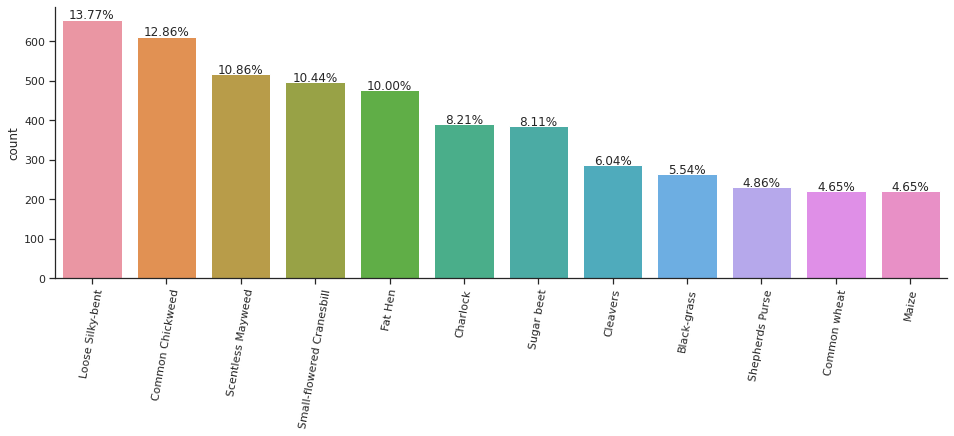

In [15]:
# Countplot with the percentages for each image label from the vector with the input images (y)

sns.set({'figure.figsize': (16, 5)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")
total = len(y)
ax = sns.countplot(x = 'Label', data = y, order = y['Label'].value_counts().index)
sns.despine()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 2, '{:1.2f}'.format(100 * height / total) + "%", ha = "center")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set(xlabel = None);

- There's a large range for the percentage of labels comparing all classes. The highest percentage of images belong to 'Loose Silky-bent' (13.77%) and the lower percentage of images belong to 'Common wheat' (4.65%).

In [16]:
# Plant Seedling names by alphabetical order

sorted(y['Label'].unique())

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [17]:
# Creating a Dictionary for the images labels

y_dictionary = {'Black-grass':0, 'Charlock':1, 'Cleavers':2, 'Common Chickweed':3,
               'Common wheat':4, 'Fat Hen':5, 'Loose Silky-bent':6, 'Maize':7,
               'Scentless Mayweed':8, 'Shepherds Purse':9, 'Small-flowered Cranesbill':10, 'Sugar beet':11}

In [18]:
# Creating an Inverse Mapping from the Dictionary with the images labels

y_dictionary_inv = {v: k for k, v in y_dictionary .items()}
y_dictionary_inv

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [19]:
# Replacing the images labels with number from 0 to 12, following the structure from the dictionary previously created

y['Label'] = y['Label'].map(y_dictionary)

In [20]:
# Converting the vector with the input images (y) to a Numpy array

y = pd.DataFrame.to_numpy(y)

#### 1.7 - Visualizing the Images in the Dataset

In [21]:
# Function to create a grid of random selected images for the category of choice (original images)

def plot_image_grid(category, grid_size):
    index_category = np.where(y == y_dictionary[category])[0]
    random_choices = random.choices(index_category, k = np.prod(grid_size))
    grid = X[random_choices]
        
    sns.set({'figure.figsize': (12, 12)})
    sns.set_style("whitegrid")
    sns.set_style("ticks")
    sns.set_context("paper")

    print("Label: {} | Plant Seedling Name: {}".format(y_dictionary[category], category))
    
    for i, variable in enumerate(random_choices):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(grid[i], cmap = 'gray');
        plt.tight_layout()

In [22]:
# Using the "plot_image_grid" function to plot a grid of 25x25 random images for each category

for i in range(len(y_dictionary_inv)):
    plot_image_grid(category = y_dictionary_inv[i], grid_size = (5, 5))
    plt.show()
    print()

Output hidden; open in https://colab.research.google.com to view.

- Looking at the 4x4 image grids for each category, it's visible that some specimens like 'Loose Silky-bent' and 'Black-grass' look very similar and that could turn the image classification process more difficult and proner to misclassifications at these 02 categories.

- Looking at the code used to convert the large dataset of images to a Numpy array (Data Description session), because the "cv2.imread()" method was used, then BGR (not RGB) is the resulting convention for the images.

***
## 2 - Data Pre-processing<a class="anchor" id="22222"></a>

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">

- Normalization
- Gaussian Blurring
- Visualize Data after Pre-processing

#### 2.1 - Creating Gaussian Blurring

In [23]:
# Function to create blurred images

def blurred_image(image, blurring_size, sigmaX):
    
    # "cv2.GaussianBlur()" applies Gaussian Smoothing on the input source image
    # "ksize" is the Gaussian Kernel Size [height width], in this case the kernel was considered to be (5, 5)
    # "sigmaX" is the kernel standard deviation along X-axis (horizontal direction). sigmaX value is taken for sigmaY
    image_blurred = cv2.GaussianBlur(src = image, ksize = blurring_size, sigmaX = sigmaX)
    
    return image_blurred

In [24]:
# Function to create a grid of random selected images for the category of choice (blurred images)

def plot_image_grid_blurring(category, blurring_size, sigmaX, grid_size):
    
    X_blurring = np.zeros(X.shape)
    for i in range(X.shape[0]):
        X_blurring[i] = blurred_image(image = X[i], blurring_size = blurring_size, sigmaX = sigmaX)
    
    index_category = np.where(y == y_dictionary[category])[0]
    random_choices = random.choices(index_category, k = np.prod(grid_size))
    grid = X[random_choices]
    grid_blurring = X_blurring[random_choices]
        
    sns.set_style("whitegrid")
    sns.set_style("ticks")
    sns.set_context("notebook", font_scale = 1.25)

    print("Label: {} | Plant Seedling Name: {}".format(y_dictionary[category], category))
    
    for i, variable in enumerate(random_choices):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(grid[i], cmap = 'gray')
        plt.tight_layout()
        plt.title('Original Image')
    plt.savefig('g0.png')
    plt.close()
    
    for i, variable in enumerate(random_choices):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(grid_blurring[i].astype('uint8'))
        plt.tight_layout()
        plt.title('Blurred Image')
    plt.savefig('g1.png')
    plt.close()
    
    f, axarr = plt.subplots(1, 2, figsize = (20, 15))
    axarr[0].imshow(mpimg.imread('g0.png'))
    axarr[1].imshow(mpimg.imread('g1.png'))
    plt.tight_layout();

In [25]:
# Applying blurring to all images and storing them in a new tensor

X_blurring = np.zeros(X.shape)
for i in range(X.shape[0]):
    X_blurring[i] = blurred_image(image = X[i], blurring_size = (5, 5), sigmaX = 0)

- The 'X-blurring' tensor contains all the images with blurring.
- This tensor with the blurred images will also be used in the CNN hyperparameters tunning process.

#### 2.2 - Visualizing the Images after Pre-processing (Blurring)

In [26]:
# Using the "plot_image_grid_blurring" function to plot a grid of 25x25 random images for each category - compare original (left) vs. blurred (right) images

for i in range(len(y_dictionary_inv)):
    plot_image_grid_blurring(category = y_dictionary_inv[i], blurring_size = (5, 5), sigmaX = 0, grid_size = (3, 3))
    plt.show()
    print()

Output hidden; open in https://colab.research.google.com to view.

- The 3x3 image grids above show random sets of 9 original images for each category (left side) and the same 9 images with blurring (right side).

- A Gaussian Smoothing (burring) with kernel size of (5, 5) was used on the input images.

- A separate CNN model with hyperparameters tuning will be built with the blurred images.

#### 2.3 - Creating Images Segmentation

- There are many different types of image segmentation. The method utilized here is called thresholding. It is a non-linear operation which converts an image into a binary image where the two levels are assigned pixels based on whether they're above or below the specified threshold value.

- First, the images needs to be converted BGR to the HSV color-space which will be useful for extracting green-colored objects. In HSV, the hue of a color refers to the pure color it resembles and the value represents the brightness. In order to remove noise, blurred images were used for the convertion from BGR to the HSV color-space.

- After making the color-space conversion, a mask with a threshold in the HSV color-space will be applied to obtain the all objects within a range of green color.

- Following that, a technique called morphological transformation is used - a 'closing' transformation is utilized because it's useful for closing small holes in the objects. In doing this, a kernel was specified to "slide through" the image applying transformations on a specified window size.

- Finally, all the green objects will be extracted alone by performing a 'bitwise_and' operation between the mask and the original image.

In [27]:
# Function to create segmented images

def segmented_image(image):
    
    # "cv2.GaussianBlur()" applies Gaussian Smoothing on the input source image
    # "ksize" is the Gaussian Kernel Size [height width], in this case the kernel was considered to be (5, 5)
    # "sigmaX" is the kernel standard deviation along X-axis (horizontal direction). sigmaX value is taken for sigmaY
    image_blurred = cv2.GaussianBlur(src = image, ksize = (5, 5), sigmaX = 0)
    
    # Conversion from BGR to HSV color-space. This is used to extract a colored object since HSV color-space is suitable for color detection.
    # "code" is the color space conversion code
    image_hsv = cv2.cvtColor(src = image_blurred, code = cv2.COLOR_BGR2HSV)
    
    # Define range of green in HSV color-space
    lower_hsv = np.array([25, 40, 50])
    upper_hsv = np.array([75, 255, 255])
        
    # "cv2.inRange()" checks if array elements lie between the elements of two other arrays
    # "lowerb" is the inclusive lower boundary array and "upperb" is inclusive upper boundary array in the HSV color-space
    image_mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    
    # "cv2.getStructuringElement()" is a structuring element used for for morphological operations
    # With aspecified "shape" (in this case elliptical) and size ("ksize") of the kernel it's possible to obtain the desired kernel
    kernel = cv2.getStructuringElement(shape = cv2.MORPH_ELLIPSE, ksize = (11,11))
    
    # "cv2.morphologyEx()" performs dilation followed by erosion ("cv2.MORPH_CLOSE"), and it's useful in removing noise
    image_mask = cv2.morphologyEx(src = image_mask, op = cv2.MORPH_CLOSE, kernel = kernel)
    
    # "cv2.bitwise_and()" calculates the per-element bit-wise conjunction of two arrays
    segmented_image = cv2.bitwise_and(src1 = image, src2 = image, mask = image_mask)
    
    return segmented_image

In [28]:
# Applying segmentation to all images and storing them in a new tensor

X_segmented = np.zeros(X.shape)
for i in range(X.shape[0]):
    X_segmented[i] = segmented_image(image = X[i])

- The 'X-segmented' tensor contains all the images with segmentation.
- This tensor with the segmented images will also be used in the CNN hyperparameters tunning process.

#### 2.4 - Visualizing the Images after Pre-processing (Segmentation)

In [29]:
# Function to create a grid of random selected images for the category of choice (segmented images)

def plot_image_grid_segmented(category, grid_size):
    
    X_segmented = np.zeros(X.shape)
    for i in range(X.shape[0]):
        X_segmented[i] = segmented_image(X[i])
    
    index_category = np.where(y == y_dictionary[category])[0]
    random_choices = random.choices(index_category, k = np.prod(grid_size))
    grid = X[random_choices]
    grid_segmented = X_segmented[random_choices]
       
    sns.set_style("whitegrid")
    sns.set_style("ticks")
    sns.set_context("notebook", font_scale = 1.25)

    print("Label: {} | Plant Seedling Name: {}".format(y_dictionary[category], category))
    
    for i, variable in enumerate(random_choices):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(grid[i], cmap = 'gray')
        plt.tight_layout()
        plt.title('Original Image')
    plt.savefig('g0.png')
    plt.close()
    
    for i, variable in enumerate(random_choices):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(grid_segmented[i].astype('uint8'))
        plt.tight_layout()
        plt.title('Segmented Image')
    plt.savefig('g1.png')
    plt.close()
    
    f, axarr = plt.subplots(1, 2, figsize = (20, 15))
    axarr[0].imshow(mpimg.imread('g0.png'))
    axarr[1].imshow(mpimg.imread('g1.png'))
    plt.tight_layout();

In [30]:
# Using the "plot_image_grid_segmented" function to plot a grid of 25x25 random images for each category - compare original (left) vs. segmented (right) images

for i in range(len(y_dictionary_inv)):
    plot_image_grid_segmented(category = y_dictionary_inv[i], grid_size = (3, 3))
    plt.show()
    print()

Output hidden; open in https://colab.research.google.com to view.

- The 3x3 image grids above show random sets of 9 original images for each category (left side) and the same 9 images with segmentation (right side).

- A separate CNN model with hyperparameters tuning will be built with the segmented images.

#### 2.5 - Normalization

- This item will be covered at the next session. The data conversion of the input images to float and normalization will be conducted after splitting the data into Train and Test sets.

***
## 3 - Make Data Compatible<a class="anchor" id="33333"></a>

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">

- Convert Labels to One-hot-vectors
- Print the Label for y_train[0]
- Split the Dataset into Training, Testing and Validation sets
- Check the Shape of Data, reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

#### 3.1 - Convert Labels to One-hot-vectors

- For this project it was decided to use "sparse_categorical_crossentropy" as a Loss Function for the CNN models, hence there's no need to create one-hot-vectors for the 12 categories representing the image labels.

- One advantage of using "sparse_categorical_crossentropy" is that it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector. See reference: https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other

#### 3.2 - Split the Dataset into Training, Testing and Validation Set

In [31]:
# Splitting the data into Train and Test sets
# Utilizing "stratify = y" to split the Train and Test sets in a stratified fashion

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = seed, stratify = y)
print("'Xtrain' Shape ", Xtrain.shape, "| 'Xtest' Shape ", Xtest.shape)
print("'y_train' Shape", y_train.shape, "          | 'y_test' Shape", y_test.shape)

'Xtrain' Shape  (3800, 128, 128, 3) | 'Xtest' Shape  (950, 128, 128, 3)
'y_train' Shape (3800, 1)           | 'y_test' Shape (950, 1)


- A Train set ('Xtrain' & 'y_train') and a Test set ('Xtest' & 'y_test') were created with 80% and 20% of the data, respectively.

- For the data splitting, a 'stratify = y' argument was utilized to create the splits with similar balance to the target variable categories frequency.

- For the hyperparameters tuning process, instead of using a Validation Set, it will be used a Cross-validation strategy with the dataset splits referenced above.

In [32]:
# Splitting the Train data into a new Train set and a Validation set

Xtrain_, Xval_, y_train_, y_val_ = train_test_split(Xtrain, y_train, test_size = 0.20, random_state = seed)
print("'Xtrain_' Shape", Xtrain_.shape, " | 'Xval_' Shape", Xval_.shape)
print("'y_train_' Shape", y_train_.shape, "          | 'y_val_' Shape", y_val_.shape)

'Xtrain_' Shape (3040, 128, 128, 3)  | 'Xval_' Shape (760, 128, 128, 3)
'y_train_' Shape (3040, 1)           | 'y_val_' Shape (760, 1)


- A new Train set ('Xtrain_' & 'ytrain_') and a Validation set ('Xval_' & 'yval_') were created with 80% and 20% of the original training data, respectively.

- These data splits with a Validation set will be used for the initial CNN model (not tuned) and for the CNN models with images augmentation.

#### 3.3 - Normalization

In [33]:
# Transforming the input images tensors ('Xtrain', 'Xtest', 'Xtrain_' and 'Xval_') to float

X_train = Xtrain.astype('float32')
X_test = Xtest.astype('float32')
X_train_ = Xtrain_.astype('float32')
X_val_ = Xval_.astype('float32')

In [34]:
# Normalization the input images tensors ('X_train', 'X_test', 'X_train_' and 'X_val_')

X_train /= 255
X_test /= 255
X_train_ /= 255
X_val_ /= 255

- The input images arrays/tensors were converted to float - that enables to get decimal values after division (normalization).

- CNNs process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. It is a good practice to normalize the pixel values so that each pixel value has a value between 0 and 1. Normalization was achieved by dividing the BGR codes with 255 (which is the maximum BGR code minus the minimum BGR code).

#### 3.4 - Print the Label for y_train[0]

In [35]:
# Previously Created Inverse Dictionary with the Labels for y

y_dictionary_inv

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

y_train[0] Category Number = 2
y_train[0] Category Label = Cleavers


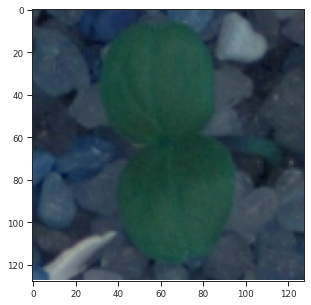

In [36]:
# Label for y_train[0]

print("y_train[0] Category Number =", y_train[0][0])
print("y_train[0] Category Label =", y_dictionary_inv[y_train[0][0]])

# Associated image for y_train[0] --> X_train[0]
sns.set({'figure.figsize': (5, 5)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("paper")
plt.imshow(X_train[0], cmap = 'gray');

- The label for 'y_train[0]' is 2, corresponding to a 'Cleavers' plant seedling category.

#### 3.5 - Check the Shape of the Data. Reshape Data into Shapes Compatible with Keras Models

In [37]:
# Dataset splits for the CNN model hyperparameters tuning thru Cross-validation (no Validation set)
print("Dataset Splits for Hyperparameters Tuning using Cross-validation (no Validation Set)")
print("'X_train' Shape  = {} \n'y_train' Shape  = {}".format(X_train.shape, y_train.shape))
print("'X_test' Shape   = {} \n'y_test' Shape   = {}\n".format(X_test.shape, y_test.shape))


# Dataset splits for the initial CNN model (not tuned) and for the CNN model with augmentation (inclusing a Valodation set)
print("Dataset Splits Including a Validation Set")
print("'X_train_' Shape = {} \n'y_train_' Shape = {}".format(X_train_.shape, y_train_.shape))
print("'X_val_' Shape   = {} \n'y_val_' Shape   = {}".format(X_val_.shape, y_val_.shape))
print("'X_test' Shape   = {} \n'y_test' Shape   = {}\n".format(X_test.shape, y_test.shape))

Dataset Splits for Hyperparameters Tuning using Cross-validation (no Validation Set)
'X_train' Shape  = (3800, 128, 128, 3) 
'y_train' Shape  = (3800, 1)
'X_test' Shape   = (950, 128, 128, 3) 
'y_test' Shape   = (950, 1)

Dataset Splits Including a Validation Set
'X_train_' Shape = (3040, 128, 128, 3) 
'y_train_' Shape = (3040, 1)
'X_val_' Shape   = (760, 128, 128, 3) 
'y_val_' Shape   = (760, 1)
'X_test' Shape   = (950, 128, 128, 3) 
'y_test' Shape   = (950, 1)



- Data splits are already in compatible shape for creating the CNN model in Keras. Because the dataset for the input images was previously processed into a Numpy array ("images.npy"), that means all the images have the same size, therefore no need to reshape them.

- For a sake of keeping the consistency for the performance checking of the predictive CNN models, the Test set is exactly the same for the 02 different data split strategies above.

- The first data splitting strategy above (without a Validation set) will be used along the hyperparameters tuning process which will use a Cross-validation strategy. The second data splitting strategy (with a Validation set) will be used to fit the initial CNN model (not tuned) and the CNN models with images augmentation. This will be covered in the next sessions.

***
## 4 - Building CNN<a class="anchor" id="44444"></a>

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">

- Define Layers
- Set Optimizer and Loss Function

#### 4.1 - Define Layers & Set Optimizer and Loss Function

- See Item 1.4 (Library of Generic Functions) for a user defined function comprising the CNN Architeture (layers), Optimizers and Loss Function.

- This function for CNN model architeture was also created to enable to perform Hyperparameters Tuning thru Randomized Search (Sklearn wrapper with a Keras CNN model).

- The defined layers within the CNN architecture were:
    - 1st Convolutional Layer with Batch Normalization and Max Pooling
    - 2nd Convolutional Layer with Batch Normalization and Max Pooling
    - 3rd Convolutional Layer with Batch Normalization and Max Pooling
    - 4th Convolutional Layer with Batch Normalization and Max Pooling
    - Dense Layer with Batch Normalization
    - Softmax Layer
    

- Batch Normalization was used in all convolutional layers to regularize the network. That also gives a resistance to the convolutional network to vanishing gradient during training. This enables to decrease training time and results into better performance. It was decided to not utilize Dropout because of the presence of Batch Normalization -  batch normalization has largely replaced dropout in modern convolutional architectures. See reference: https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html

- Max Pooling was also used in all convolutional layers to simplify (down sample) the feature maps. It helps to reduce over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.

- Several Optimizers (SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax and Nadam) were include in the CNN Architecture function. However, at the hyperparameters tuning step, 'Adam' optimizer will be a standard choice for all the runs. This is following the recommendation from the Problem Statement and from the Academic Team.

- Also, as previously mentioned, "sparse_categorical_crossentropy" was chosen as the Loss Function for the CNN models. That will save time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

***
## 5 - Fit and Evaluate Model and Print Confusion Matrix<a class="anchor" id="55555"></a>

#### 5.1 - Fit and Evaluate the Initial Model (Default Parameters at the CNN Architecture Function)

- Initial/default parameters for CNN Architecture Function ('create model'):
  - optimizer = 'Adam', init = 'normal', learn_rate = 0.005, epsilon = 1e-04, activation = 'relu', input_sh = (128, 128, 3)
  - filters_1st_conv = 32, kernel_1st_conv = 3, strides_1st_conv = (1, 1)
  - filters_2nd_conv = 32, kernel_2nd_conv = 3, strides_2nd_conv = (1, 1)
  - filters_3rd_conv = 64, kernel_3rd_conv = 3, strides_3rd_conv = (1, 1)
  - filters_4th_conv = 64, kernel_4th_conv = 3, strides_4th_conv = (1, 1)
  - pool_size = (2, 2)
  - neurons_dense_1st = 32)

In [101]:
# Previously defined function "create_model" is used to instantiate the CNN model with default parameters

CNN_original_initial = create_model()

In [ ]:
# Fitting the Neural Network Classification model with the defaults parameters from the "create_model" function

history_CNN_original_initial = CNN_original_initial.fit(X_train_, y_train_, epochs = 30, batch_size = 32, validation_data = (X_val_, y_val_), verbose = True)

In [103]:
# Creating a dataframe with the Keras model records (history)

hist = pd.DataFrame(history_CNN_original_initial.history)
hist.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,1.470375,0.518092,8.970295,0.138158
1,0.818722,0.725987,9.021050,0.136842
2,0.585186,0.810855,7.866670,0.138158
3,0.439881,0.856908,5.508231,0.175000
4,0.322814,0.891447,3.487683,0.285526


In [104]:
# Building a dataframe with all the records (epochs) of the Loss ('binary_crossentropy') and other model metrics for both Train and Validation sets

model_results = pd.DataFrame({"Epoch" : history_CNN_original_initial.epoch,
                              "Training Crossentropy Loss" : hist.iloc[:, 0],
                              "Validation Crossentropy Loss" : hist.iloc[:, 2],
                              "Training Accuracy" : hist.iloc[:, 1],
                              "Validation Accuracy" : hist.iloc[:, 3]})
model_results.tail(10)

,Epoch,Training Crossentropy Loss,Validation Crossentropy Loss,Training Accuracy,Validation Accuracy
20,20,0.052158,1.759746,0.982895,0.628947
21,21,0.049441,1.465034,0.983882,0.710526
22,22,0.042426,2.620754,0.986184,0.576316
23,23,0.043992,1.505779,0.986184,0.700000
24,24,0.053101,1.304884,0.981250,0.746053
25,25,0.035920,0.774119,0.988158,0.822368
26,26,0.016775,0.639171,0.995066,0.844737
27,27,0.015551,0.858434,0.995724,0.805263
28,28,0.013467,0.737497,0.996382,0.839474
29,29,0.019382,1.451474,0.994408,0.748684


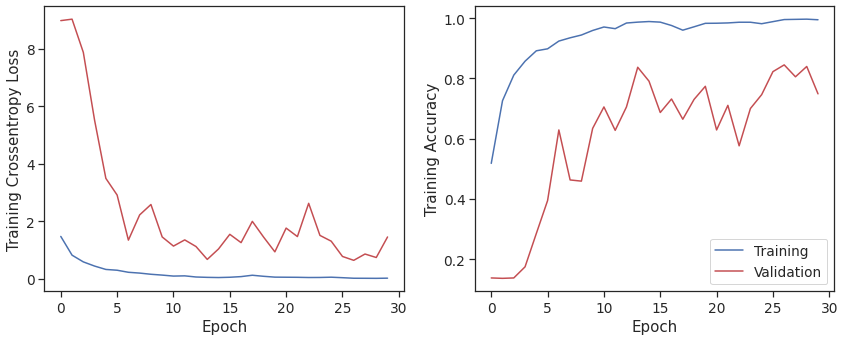

In [105]:
# Lineplot for the model Loss, with a hue to distinguish the Train set from the Validation set results

sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale = 1.25)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x = "Epoch", y = "Training Crossentropy Loss", color = "b", data = model_results, ax = axs[0])
sns.lineplot(x = "Epoch", y = "Validation Crossentropy Loss", color = "r", data = model_results, ax = axs[0])

sns.lineplot(x = "Epoch", y = "Training Accuracy", color = "b", data = model_results, ax = axs[1])
sns.lineplot(x = "Epoch", y = "Validation Accuracy", color = "r", data = model_results, ax = axs[1])

plt.legend(['Training', 'Validation'], loc = 'lower right')
plt.tight_layout();

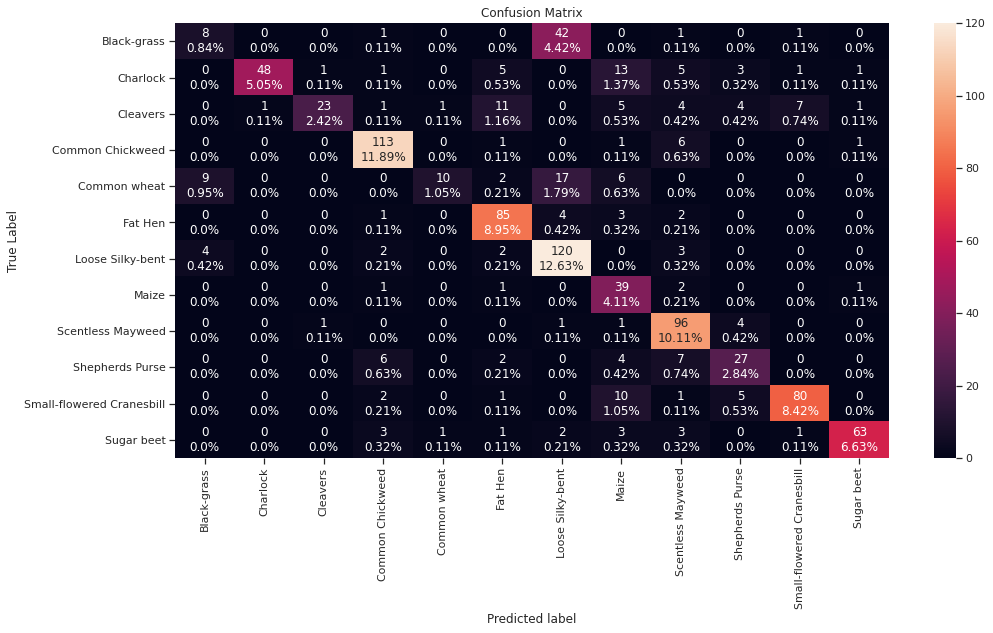


              precision    recall  f1-score   support

           0     0.3810    0.1509    0.2162        53
           1     0.9796    0.6154    0.7559        78
           2     0.9200    0.3966    0.5542        58
           3     0.8626    0.9262    0.8933       122
           4     0.8333    0.2273    0.3571        44
           5     0.7658    0.8947    0.8252        95
           6     0.6452    0.9160    0.7571       131
           7     0.4588    0.8864    0.6047        44
           8     0.7385    0.9320    0.8240       103
           9     0.6279    0.5870    0.6067        46
          10     0.8889    0.8081    0.8466        99
          11     0.9403    0.8182    0.8750        77

    accuracy                         0.7495       950
   macro avg     0.7535    0.6799    0.6763       950
weighted avg     0.7733    0.7495    0.7320       950



In [106]:
# Creating the Confusion Matrix for the Initial Model (Default Parameters at the CNN Architecture Function)

make_confusion_matrix(model = CNN_original_initial, X_test = X_test, y_test = y_test, plot_title = "Confusion Matrix", summary_metrics = True, library = 'keras')

In [107]:
# Defining the list of CNN models to store the Test Accuracy results

CNN_model = []
test_accuracy = []
CNN_model.append('Original_initial')
test_accuracy.append(model_accuracy)

In [108]:
# Comparison dataframe with the Test Accuracy for all the CNN models

comparison_frame = pd.DataFrame({'CNN Model' : CNN_model, 'Test Accuracy' : test_accuracy}) 
comparison_frame

,CNN Model,Test Accuracy
0,Original_initial,0.749474


- The Initial CNN Model with Original images (CNN_original_initial) returned a multiclass Accuracy of 0.7495 on the Test Set.

- The class with most of the misclassifications was 'Black-grass' (Class '0') with a F1-Score of 0.2162 on the Test Set.

- The Accuracy result for this CNN Classification model was stored into a dataframe (comparison_frame) for a sake of comparison to other models along this session.

#### 5.2 - Fit and Evaluate the CNN Model with Hyperparameters Tuning for Original Images

- Keras models can be used in Sklearn by wrapping them with the KerasClassifier. To use this wrapper, a previously created function with the Keras sequential model ('create_model) will be passed to the 'build_fn' argument when constructing the KerasClassifier class.

- A Ramdomized Search with 25 iterations will be utilized for Hyperparameters tuning in Sklearn. The 'RamdomizedSearchCV' Class is supported by a dictionary with the hyperparameters to evaluate in the 'param_distributions' argument.

- The 'accuracy' was defined as the score to be optimized.

- The 'RandomizedSearchCV' process will then construct and evaluate one model for each combination of parameters. A Cross validation with 02 folds will be used to evaluate each individual model.

- At the end of the tuning process, the CNN model with the best Hyperparameters (out of the 25 iterations) will be selected and both Train Cross-validated average Accuracy and Test Accuracy will be returned.

In [ ]:
# Hyperparameters Tuning for the CNN Model with Original Images

# Start Counting the Running Time
tic = time()

# Previously defined function "create_model" is used to call the default CNN model within a Sklearn wrapper for Keras ('KerasClassifier')
# This step is required for Hyperparameters tuning thru Sklearn Randomized Search
keras_classifier = KerasClassifier(build_fn = create_model, verbose = None)

# Dictionary with all Hyperparameters included in Ramdomized Search process
parameters = {'input_sh' : [(128, 128, 3)],
              'optimizer' : ['Adam'],
              'init' : ['glorot_uniform', 'normal', 'uniform', 'he_normal'],
              'epochs' : [30, 45, 60, 75, 90],
              'batch_size' : [64, 128],
              'learn_rate' : [0.0005, 0.001, 0.005, 0.01],
              'epsilon': [1e-02, 1e-04, 1e-06, 1e-08],
              'activation' : ['relu'],
              'pool_size' : [(2, 2)],

              'filters_1st_conv' : [32, 64],
              'kernel_1st_conv' : [5, 3],
              'strides_1st_conv' : [(1, 1)],

              'filters_2nd_conv' : [32, 64],
              'kernel_2nd_conv' : [5, 3],
              'strides_2nd_conv' : [(1, 1)], 

              'filters_3rd_conv' : [64, 128],
              'kernel_3rd_conv' : [5, 3],
              'strides_3rd_conv' : [(1, 1)],

              'filters_4th_conv' : [128, 256],
              'kernel_4th_conv' : [5, 3],
              'strides_4th_conv' : [(1, 1)],
                                 
              'neurons_dense_1st' : [128, 256]}

# Defining the Scoring Metric (Accuracy)
scoring = 'accuracy'

# Calling RandomizedSearchCV
grid_cv = RandomizedSearchCV(estimator = keras_classifier, param_distributions = parameters, scoring = scoring, n_iter = n_iterationsRS,
                             cv = KFold(n_splits = n_folds, shuffle = True, random_state = seed), random_state = seed, verbose = 20)
# Fitting the Models
CNN_original_tuned = grid_cv.fit(X_train, y_train)

# Setting the best selected Neural Network Classification model (best combination of hyperparameters)
CNN_original_tuned_result = grid_cv.best_estimator_
CNN_original_tuned_result_params = grid_cv.best_params_
y_pred = CNN_original_tuned_result.predict(X_test)
CNN_original_tuned_test_score = accuracy_score(y_test, y_pred)

print()
print("Best Parameters:{} \nTrain Accuracy CV Avg Score: {} \nTest Accuracy: {}".format(grid_cv.best_params_,
                                                                                        round(grid_cv.best_score_, 3),
                                                                                        CNN_original_tuned_test_score))
print()

# Time in seconds taken to complete the hyperparameters tuning process
CNN_original_tuned_model_time = time() - tic
print("done in {:.3f}s".format(CNN_original_tuned_model_time))

In [47]:
# Creating a dataframe with all Ramdomized Search iterations and sorting it by rank test score
# 1st model in the dataframe is ranked #1 or the best Classification model for the defined scoring metric (Accuracy)

scores_CNN_original_tuned = pd.DataFrame(CNN_original_tuned.cv_results_)
scores_CNN_original_tuned = scores_CNN_original_tuned.sort_values(by = ['rank_test_score']).reset_index(drop = 'index')
scores_CNN_original_tuned.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
mean_fit_time,61.5147,42.6891,31.1199,47.1655,43.8347,51.7241,62.9081,70.2084,32.6327,49.6387,18.1849,23.4885,53.2991,60.6295,25.2232,63.4614,50.9774,66.5566,60.252,32.5835,30.5572,21.1459,22.032,20.5263,22.4443
std_fit_time,0.154823,0.128333,0.0676676,0.285888,0.0416042,0.189001,0.0372734,0.547749,0.108471,0.257312,0.0794175,0.158031,0.201964,0.0887338,0.325267,0.290379,0.273925,16.3515,0.324246,0.0235895,0.709016,0.222995,0.495283,0.116604,0.0449597
mean_score_time,0.371863,0.505748,0.349504,0.333756,0.41208,0.487098,0.37359,0.403674,0.309898,0.338589,0.320821,0.348269,0.354657,0.363178,0.372293,0.438878,0.317223,0.320591,0.368892,0.31764,0.427384,0.360054,0.347119,0.343593,0.338124
std_score_time,0.000302196,0.149425,0.00185525,0.000780821,3.75509e-05,0.155795,0.00498295,0.00136447,0.000239253,0.00116146,9.98974e-05,0.00017035,0.00222838,0.00323248,0.00341284,0.000724912,0.00400114,0.00114059,0.000225902,0.00553775,0.00111508,0.00118697,0.000373483,0.00025475,3.83854e-05
param_strides_4th_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_strides_3rd_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_strides_2nd_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_strides_1st_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_pool_size,"(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)"
param_optimizer,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam


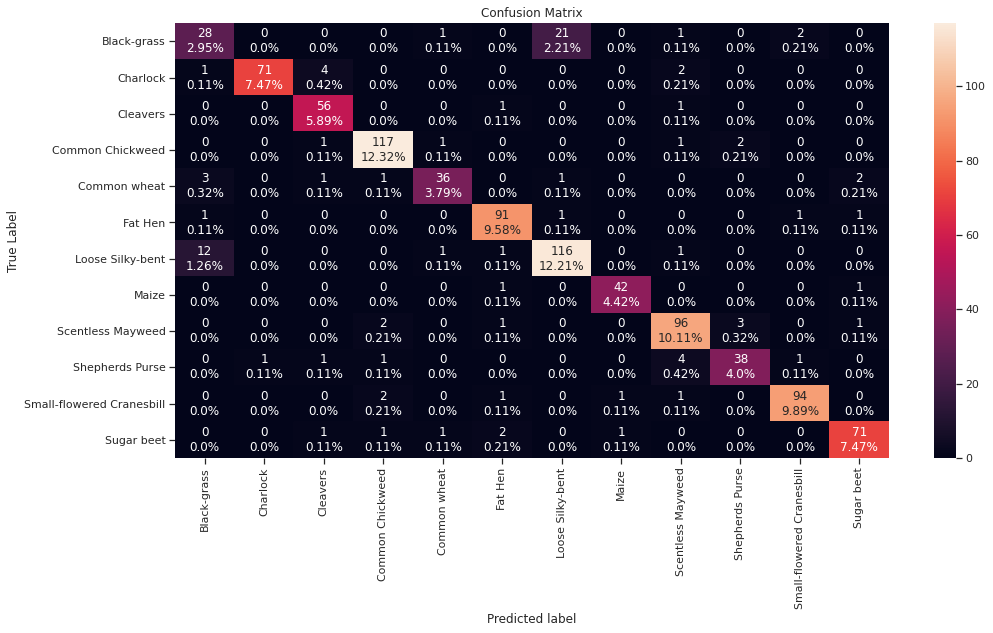


              precision    recall  f1-score   support

           0     0.6222    0.5283    0.5714        53
           1     0.9861    0.9103    0.9467        78
           2     0.8750    0.9655    0.9180        58
           3     0.9435    0.9590    0.9512       122
           4     0.9000    0.8182    0.8571        44
           5     0.9286    0.9579    0.9430        95
           6     0.8345    0.8855    0.8593       131
           7     0.9545    0.9545    0.9545        44
           8     0.8972    0.9320    0.9143       103
           9     0.8837    0.8261    0.8539        46
          10     0.9592    0.9495    0.9543        99
          11     0.9342    0.9221    0.9281        77

    accuracy                         0.9011       950
   macro avg     0.8932    0.8841    0.8877       950
weighted avg     0.8998    0.9011    0.8997       950



In [109]:
# Creating the Confusion Matrix for the CNN Model with Hyperparameters Tuning for Original Images

make_confusion_matrix(model = CNN_original_tuned_result, X_test = X_test, y_test = y_test, plot_title = "Confusion Matrix", summary_metrics = True)

In [110]:
# Defining the list of CNN models to store the Test Accuracy results

CNN_model.append('Original_tuned')
test_accuracy.append(model_accuracy)

In [111]:
# Comparison dataframe with the Test Accuracy for all the CNN models

comparison_frame = pd.DataFrame({'CNN Model' : CNN_model, 'Test Accuracy' : test_accuracy}) 
comparison_frame.style.highlight_min(color = 'red', axis = 0).highlight_max(color = 'lightgreen', axis = 0)

,CNN Model,Test Accuracy
0,Original_initial,0.749474
1,Original_tuned,0.901053


- Best Parameters:{'strides_4th_conv': (1, 1), 'strides_3rd_conv': (1, 1), 'strides_2nd_conv': (1, 1), 'strides_1st_conv': (1, 1), 'pool_size': (2, 2), 'optimizer': 'Adam', 'neurons_dense_1st': 128, 'learn_rate': 0.005, 'kernel_4th_conv': 3, 'kernel_3rd_conv': 3, 'kernel_2nd_conv': 3, 'kernel_1st_conv': 3, 'input_sh': (128, 128, 3), 'init': 'he_normal', 'filters_4th_conv': 128, 'filters_3rd_conv': 64, 'filters_2nd_conv': 64, 'filters_1st_conv': 64, 'epsilon': 1e-08, 'epochs': 75, 'batch_size': 128, 'activation': 'relu'} \
Train Accuracy CV Avg Score: 0.847 

- The tuned CNN Model with Original images (CNN_original_tuned) returned a multiclass Accuracy of 0.9011 on the Test Set, which is much better than the Accuracy for the CNN_original_initial model (0.7495).

- The class with most of the misclassifications was 'Black-grass' (Class '0') with a F1-Score of 0.5714 on the Test Set.

- The Accuracy result for this CNN Classification model was stored into a dataframe (comparison_frame) for a sake of comparison to other models along this session.

#### 5.3 - Fit and Evaluate the CNN Model with Hyperparameters Tuning for Blurred Images

In [51]:
# Creating the Dataset Splits for the Blurred Images (Xtrain_blurred, Xtest_blurred, y_train, y_test)

Xtrain_blurred, Xtest_blurred, y_train, y_test = train_test_split(X_blurring, y, test_size = 0.20, random_state = seed, stratify = y)

In [52]:
# Transforming the input images tensors (Xtrain_blurred, Xtest_blurred) to float

X_train_blurred = Xtrain_blurred.astype('float32')
X_test_blurred = Xtest_blurred.astype('float32')

In [53]:
# Normalizing the input images tensors (X_train_blurred and X_test_blurred)

X_train_blurred /= 255
X_test_blurred /= 255

In [ ]:
# Hyperparameters Tuning for the CNN Model with Blurred Images

# Start Counting the Running Time
tic = time()

# Previously defined function "create_model" is used to call the default CNN model within a Sklearn wrapper for Keras ('KerasClassifier')
# This step is required for Hyperparameters tuning thru Sklearn Randomized Search
keras_classifier = KerasClassifier(build_fn = create_model, verbose = None)

# Dictionary with all Hyperparameters included in Ramdomized Search process
parameters = {'input_sh' : [(128, 128, 3)],
              'optimizer' : ['Adam'],
              'init' : ['glorot_uniform', 'normal', 'uniform', 'he_normal'],
              'epochs' : [30, 45, 60, 75, 90],
              'batch_size' : [64, 128],
              'learn_rate' : [0.0005, 0.001, 0.005, 0.01],
              'epsilon': [1e-02, 1e-04, 1e-06, 1e-08],
              'activation' : ['relu'],
              'pool_size' : [(2, 2)],

              'filters_1st_conv' : [32, 64],
              'kernel_1st_conv' : [5, 3],
              'strides_1st_conv' : [(1, 1)],

              'filters_2nd_conv' : [32, 64],
              'kernel_2nd_conv' : [5, 3],
              'strides_2nd_conv' : [(1, 1)], 

              'filters_3rd_conv' : [64, 128],
              'kernel_3rd_conv' : [5, 3],
              'strides_3rd_conv' : [(1, 1)],

              'filters_4th_conv' : [128, 256],
              'kernel_4th_conv' : [5, 3],
              'strides_4th_conv' : [(1, 1)],
                                 
              'neurons_dense_1st' : [128, 256]}

# Defining the Scoring Metric (Accuracy)
scoring = 'accuracy'

# Calling RandomizedSearchCV
grid_cv = RandomizedSearchCV(estimator = keras_classifier, param_distributions = parameters, scoring = scoring, n_iter = n_iterationsRS,
                             cv = KFold(n_splits = n_folds, shuffle = True, random_state = seed), random_state = seed, verbose = 20)
# Fitting the Models
CNN_blurred_tuned = grid_cv.fit(X_train_blurred, y_train)

# Setting the best selected Neural Network Classification model (best combination of hyperparameters)
CNN_blurred_tuned_result = grid_cv.best_estimator_
CNN_blurred_tuned_result_params = grid_cv.best_params_
y_pred = CNN_blurred_tuned_result.predict(X_test_blurred)
CNN_blurred_tuned_test_score = accuracy_score(y_test, y_pred)

print()
print("Best Parameters:{} \nTrain Accuracy CV Avg Score: {} \nTest Accuracy: {}".format(grid_cv.best_params_,
                                                                                        round(grid_cv.best_score_, 3),
                                                                                        CNN_blurred_tuned_test_score))
print()

# Time in seconds taken to complete the hyperparameters tuning process
CNN_blurred_tuned_model_time = time() - tic
print("done in {:.3f}s".format(CNN_blurred_tuned_model_time))

In [55]:
# Creating a dataframe with all Ramdomized Search iterations and sorting it by rank test score
# 1st model in the dataframe is ranked #1 or the best Classification model for the defined scoring metric (Accuracy)
scores_CNN_blurred_tuned = pd.DataFrame(CNN_blurred_tuned.cv_results_)
scores_CNN_blurred_tuned = scores_CNN_blurred_tuned.sort_values(by = ['rank_test_score']).reset_index(drop = 'index')
scores_CNN_blurred_tuned.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
mean_fit_time,61.2138,42.8471,62.7579,32.443,52.9288,51.3735,70.0362,49.2505,46.987,23.4971,60.9446,25.1733,63.4982,50.4864,50.8193,59.7976,18.2372,32.6811,43.623,30.0782,31.1212,20.9059,20.695,21.907,22.2091
std_fit_time,0.0717454,0.188409,0.212862,0.00281537,0.0573151,0.0848248,0.313747,0.125181,0.253604,0.0273116,0.179738,0.13267,0.16635,0.133958,0.0675097,0.00362456,0.181747,0.00110257,0.034785,0.183062,0.156561,0.00385821,0.193763,0.17473,0.0188024
mean_score_time,0.375734,0.360612,0.379479,0.322765,0.357234,0.338427,0.40156,0.34769,0.329543,0.352382,0.3622,0.379902,0.442447,0.321217,0.318089,0.380223,0.325306,0.317875,0.411717,0.423681,0.351915,0.35123,0.353708,0.360558,0.348921
std_score_time,0.00305939,0.000773191,0.00429201,0.00622082,0.000145793,0.00931287,0.000770569,0.00314355,0.00124371,0.00023365,0.0033679,0.000992656,0.000375628,0.00056231,0.000124454,0.00093174,0.00156069,0.00248253,0.00404322,0.00190949,0.000574946,0.00120592,0.000724077,0.000523329,0.00509048
param_strides_4th_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_strides_3rd_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_strides_2nd_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_strides_1st_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_pool_size,"(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)"
param_optimizer,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam


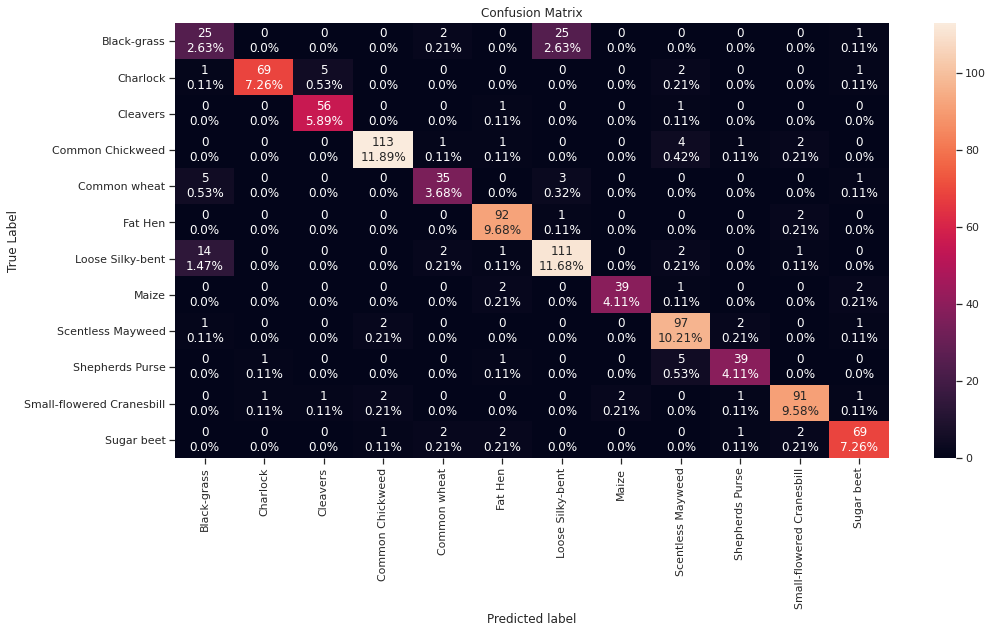


              precision    recall  f1-score   support

           0     0.5435    0.4717    0.5051        53
           1     0.9718    0.8846    0.9262        78
           2     0.9032    0.9655    0.9333        58
           3     0.9576    0.9262    0.9417       122
           4     0.8333    0.7955    0.8140        44
           5     0.9200    0.9684    0.9436        95
           6     0.7929    0.8473    0.8192       131
           7     0.9512    0.8864    0.9176        44
           8     0.8661    0.9417    0.9023       103
           9     0.8864    0.8478    0.8667        46
          10     0.9286    0.9192    0.9239        99
          11     0.9079    0.8961    0.9020        77

    accuracy                         0.8800       950
   macro avg     0.8719    0.8625    0.8663       950
weighted avg     0.8794    0.8800    0.8788       950



In [112]:
make_confusion_matrix(model = CNN_blurred_tuned_result, X_test = X_test_blurred, y_test = y_test, plot_title = "Confusion Matrix", summary_metrics = True)

In [113]:
# Defining the list of CNN models to store the Test Accuracy results

CNN_model.append('Blurred_tuned')
test_accuracy.append(model_accuracy)

In [114]:
# Comparison dataframe with the Test Accuracy for all the CNN models

comparison_frame = pd.DataFrame({'CNN Model' : CNN_model, 'Test Accuracy' : test_accuracy}) 
comparison_frame.style.highlight_min(color = 'red', axis = 0).highlight_max(color = 'lightgreen', axis = 0)

,CNN Model,Test Accuracy
0,Original_initial,0.749474
1,Original_tuned,0.901053
2,Blurred_tuned,0.880000


- Best Parameters:{'strides_4th_conv': (1, 1), 'strides_3rd_conv': (1, 1), 'strides_2nd_conv': (1, 1), 'strides_1st_conv': (1, 1), 'pool_size': (2, 2), 'optimizer': 'Adam', 'neurons_dense_1st': 128, 'learn_rate': 0.005, 'kernel_4th_conv': 3, 'kernel_3rd_conv': 3, 'kernel_2nd_conv': 3, 'kernel_1st_conv': 3, 'input_sh': (128, 128, 3), 'init': 'he_normal', 'filters_4th_conv': 128, 'filters_3rd_conv': 64, 'filters_2nd_conv': 64, 'filters_1st_conv': 64, 'epsilon': 1e-08, 'epochs': 75, 'batch_size': 128, 'activation': 'relu'} \
Train Accuracy CV Avg Score: 0.84

- The tuned CNN Model with Blurred images (CNN_blurred_tuned) returned a multiclass Accuracy of 0.8800 on the Test Set, which is slightly worse than the Accuracy got for the CNN_original_tuned model (0.9011).

- The class with most of the misclassifications was 'Black-grass' (Class '0') with a F1-Score of 0.5051 on the Test Set.

- The Accuracy result for this CNN Classification model was stored into a dataframe (comparison_frame) for a sake of comparison to other models along this session.

#### 5.4 - Fit and Evaluate the CNN Model with Hyperparameters Tuning for Segmented Images

In [95]:
# Creating the Dataset Splits for the Segmented Images (Xtrain_segmented, Xtest_segmented, y_train, y_test)

Xtrain_segmented, Xtest_segmented, y_train, y_test = train_test_split(X_segmented, y, test_size = 0.20, random_state = seed, stratify = y)

In [96]:
# Transforming the input images tensors (Xtrain_segmented, Xtest_segmented) to float

X_train_segmented = Xtrain_segmented.astype('float32')
X_test_segmented = Xtest_segmented.astype('float32')

In [97]:
# Normalizing the input images tensors (X_train_segmented and X_test_segmented)

X_train_segmented /= 255
X_test_segmented /= 255

In [ ]:
# Hyperparameters Tuning for the CNN Model with Segmented Images

# Start Counting the Running Time
tic = time()

# Previously defined function "create_model" is used to call the default CNN model within a Sklearn wrapper for Keras ('KerasClassifier')
# This step is required for Hyperparameters tuning thru Sklearn Randomized Search
keras_classifier = KerasClassifier(build_fn = create_model, verbose = None)

# Dictionary with all Hyperparameters included in Ramdomized Search process
parameters = {'input_sh' : [(128, 128, 3)],
              'optimizer' : ['Adam'],
              'init' : ['glorot_uniform', 'normal', 'uniform', 'he_normal'],
              'epochs' : [30, 45, 60, 75, 90],
              'batch_size' : [64, 128],
              'learn_rate' : [0.0005, 0.001, 0.005, 0.01],
              'epsilon': [1e-02, 1e-04, 1e-06, 1e-08],
              'activation' : ['relu'],
              'pool_size' : [(2, 2)],

              'filters_1st_conv' : [32, 64],
              'kernel_1st_conv' : [5, 3],
              'strides_1st_conv' : [(1, 1)],

              'filters_2nd_conv' : [32, 64],
              'kernel_2nd_conv' : [5, 3],
              'strides_2nd_conv' : [(1, 1)], 

              'filters_3rd_conv' : [64, 128],
              'kernel_3rd_conv' : [5, 3],
              'strides_3rd_conv' : [(1, 1)],

              'filters_4th_conv' : [128, 256],
              'kernel_4th_conv' : [5, 3],
              'strides_4th_conv' : [(1, 1)],
                                 
              'neurons_dense_1st' : [128, 256]}

# Defining the Scoring Metric (Accuracy)
scoring = 'accuracy'

# Calling RandomizedSearchCV
grid_cv = RandomizedSearchCV(estimator = keras_classifier, param_distributions = parameters, scoring = scoring, n_iter = n_iterationsRS,
                             cv = KFold(n_splits = n_folds, shuffle = True, random_state = seed), random_state = seed, verbose = 20)
# Fitting the Models
CNN_segmented_tuned = grid_cv.fit(X_train_segmented, y_train)

# Setting the best selected Neural Network Classification model (best combination of hyperparameters)
CNN_segmented_tuned_result = grid_cv.best_estimator_
CNN_segmented_tuned_result_params = grid_cv.best_params_
y_pred = CNN_segmented_tuned_result.predict(X_test_segmented)
CNN_segmented_tuned_test_score = accuracy_score(y_test, y_pred)

print()
print("Best Parameters:{} \nTrain Accuracy CV Avg Score: {} \nTest Accuracy: {}".format(grid_cv.best_params_,
                                                                                        round(grid_cv.best_score_, 3),
                                                                                        CNN_segmented_tuned_test_score))
print()

# Time in seconds taken to complete the hyperparameters tuning process
CNN_segmented_tuned_model_time = time() - tic
print("done in {:.3f}s".format(CNN_segmented_tuned_model_time))

In [99]:
# Creating a dataframe with all Ramdomized Search iterations and sorting it by rank test score
# 1st model in the dataframe is ranked #1 or the best Classification model for the defined scoring metric (Accuracy)
scores_CNN_segmented_tuned = pd.DataFrame(CNN_segmented_tuned.cv_results_)
scores_CNN_segmented_tuned = scores_CNN_segmented_tuned.sort_values(by = ['rank_test_score']).reset_index(drop = 'index')
scores_CNN_segmented_tuned.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
mean_fit_time,42.996,60.6816,30.8199,32.2534,69.5296,46.8278,62.2705,51.1972,43.4269,52.6109,63.3939,48.944,25.0066,50.2115,60.4221,17.9349,59.3298,32.7131,23.5152,50.1834,29.8116,20.7249,20.4147,21.5456,22.0111
std_fit_time,0.00114608,0.115634,0.166402,0.0397196,0.0157861,0.0840573,0.0193726,0.0138388,0.0138979,0.00462651,0.065941,0.163829,0.0553645,0.222972,0.0816519,0.00366032,0.0205727,0.169996,0.265929,0.229666,0.0162773,0.0020262,0.0263076,0.0321167,0.00502288
mean_score_time,0.363651,0.369484,0.51065,0.306712,0.402202,0.332779,0.373048,0.325643,0.407979,0.351381,0.442472,0.340462,0.377668,0.320133,0.357902,0.325054,0.372301,0.314218,0.351179,0.311498,0.427371,0.356379,0.340966,0.351201,0.340984
std_score_time,0.00771224,0.000727177,0.16767,0.00103319,0.000219822,0.00312448,0.00189054,0.000199199,0.00297844,0.00176895,4.01735e-05,0.00226033,0.00184214,0.00395989,0.000284076,0.00341332,0.000937343,0.000532389,0.000538707,0.00381398,0.00547481,0.000490785,0.000380635,0.00210381,0.000813127
param_strides_4th_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_strides_3rd_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_strides_2nd_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_strides_1st_conv,"(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)","(1, 1)"
param_pool_size,"(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)","(2, 2)"
param_optimizer,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam,Adam


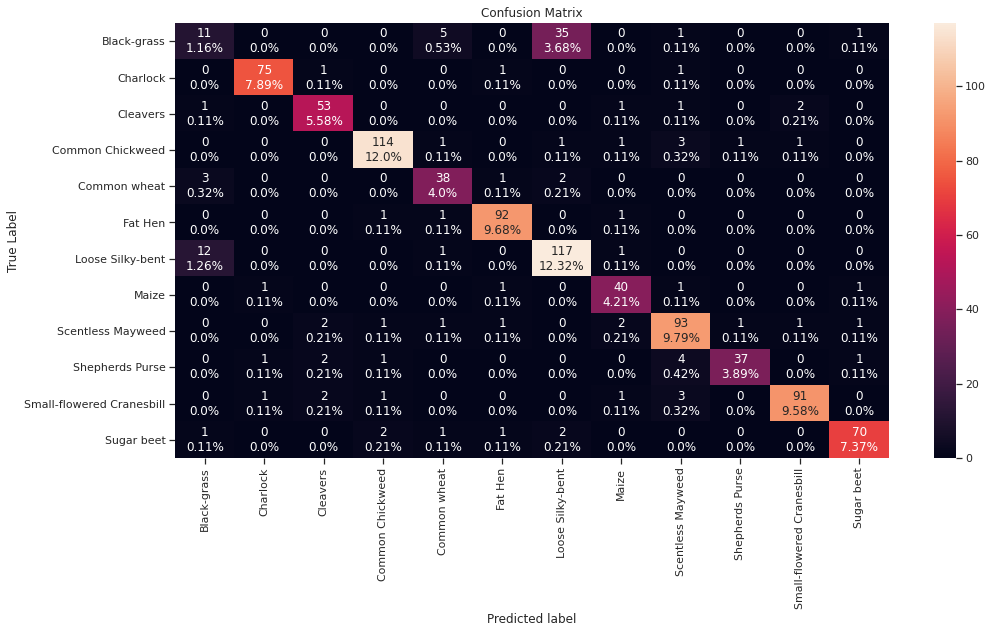


              precision    recall  f1-score   support

           0     0.3929    0.2075    0.2716        53
           1     0.9615    0.9615    0.9615        78
           2     0.8833    0.9138    0.8983        58
           3     0.9500    0.9344    0.9421       122
           4     0.7917    0.8636    0.8261        44
           5     0.9485    0.9684    0.9583        95
           6     0.7452    0.8931    0.8125       131
           7     0.8511    0.9091    0.8791        44
           8     0.8692    0.9029    0.8857       103
           9     0.9487    0.8043    0.8706        46
          10     0.9579    0.9192    0.9381        99
          11     0.9459    0.9091    0.9272        77

    accuracy                         0.8747       950
   macro avg     0.8538    0.8489    0.8476       950
weighted avg     0.8672    0.8747    0.8679       950



In [115]:
make_confusion_matrix(model = CNN_segmented_tuned_result, X_test = X_test_segmented, y_test = y_test, plot_title = "Confusion Matrix", summary_metrics = True)

In [116]:
# Defining the list of CNN models to store the Test Accuracy results

CNN_model.append('Segmented_tuned')
test_accuracy.append(model_accuracy)

In [117]:
# Comparison dataframe with the Test Accuracy for all the CNN models

comparison_frame = pd.DataFrame({'CNN Model' : CNN_model, 'Test Accuracy' : test_accuracy}) 
comparison_frame.style.highlight_min(color = 'red', axis = 0).highlight_max(color = 'lightgreen', axis = 0)

,CNN Model,Test Accuracy
0,Original_initial,0.749474
1,Original_tuned,0.901053
2,Blurred_tuned,0.880000
3,Segmented_tuned,0.874737


- Best Parameters:{'strides_4th_conv': (1, 1), 'strides_3rd_conv': (1, 1), 'strides_2nd_conv': (1, 1), 'strides_1st_conv': (1, 1), 'pool_size': (2, 2), 'optimizer': 'Adam', 'neurons_dense_1st': 128, 'learn_rate': 0.005, 'kernel_4th_conv': 5, 'kernel_3rd_conv': 5, 'kernel_2nd_conv': 5, 'kernel_1st_conv': 3, 'input_sh': (128, 128, 3), 'init': 'glorot_uniform', 'filters_4th_conv': 256, 'filters_3rd_conv': 64, 'filters_2nd_conv': 64, 'filters_1st_conv': 32, 'epsilon': 1e-08, 'epochs': 60, 'batch_size': 64, 'activation': 'relu'} \
Train Accuracy CV Avg Score: 0.819 

- The tuned CNN Model with Segmented images (CNN_segmented_tuned) returned a multiclass Accuracy of 0.8747 on the Test Set, which is slightly worse than the Accuracies for the CNN_original_tuned (0.9011) and CNN_blurred_tuned (0.8800) models.

- The class with most of the misclassifications was 'Black-grass' (Class '0') with a F1-Score of 0.2716 on the Test Set.

- The Accuracy result for this CNN Classification model was stored into a dataframe (comparison_frame) for a sake of comparison to other models along this session.

#### 5.5 - Fit and Evaluate the CNN Model with Image Augmentation for Original Images

- The 'ImageDataGenerator' object generates batches of tensor images with real-time data augmentation. It's a data augmentation technique that works by applying user-defined transformations to the training samples to generate additional/augmented data. For example, the training images may be rotated by a certain number of degrees or zoomed in by a given percentage. There can also be random horizontal and vertical shifts or flips, etc. See reference for examples: https://fairyonice.github.io/Learn-about-ImageDataGenerator.html

- In each epoch, the 'ImageDataGenerator' applies a transformation on the input images and use the transformed images for training. By doing this, somehow new data is being created (i.e. also called data augmentation), but obviously the generated images are not totally different from the original ones. This way the learned model may be more robust and accurate as it is trained on different variations of the same image. Basically, the input images are being "augmented" by using different transformations of each image in each epoch.

- The images augmentation iterator ('flow' method) takes data & label arrays and generates batches of augmented data "on the fly" at the model fitting process. Transforming data on the fly can save memory, but will result in slower training.

- It' very important to set the 'steps_per_epoch' argument on the 'fit' method to 'n_samples / batch_size', where 'n_samples' is the total number of training data. This way, in each epoch, each training sample is augmented only once and therefore 'n_samples' transformed images will be generated in each epoch. See reference: https://stackoverflow.com/questions/51748514/does-imagedatagenerator-add-more-images-to-my-dataset/51748870#51748870

In [118]:
# Create data generator (instance of the 'ImageDataGenerator' class)
# Once constructed, an iterator can be created for an image dataset
# The iterator will return one batch of augmented images for each iteration

datagen = ImageDataGenerator(rotation_range = 180, # Randomly rotate images in the range
                             zoom_range = 0.3, # Randomly zoom image [lower, upper] = [1 - zoom_range, 1 + zoom_range]
                             horizontal_flip = True, # Randomly shift images horizontally
                             vertical_flip = True, # Randomly shift images vertically 
                             width_shift_range = 0.2, # Percentage (between 0 and 1) of the width of the image to shift
                             height_shift_range = 0.2, # Percentage (between 0 and 1) of the height of the image to shift
                             validation_split = 0.2) # Fraction of images reserved for validation

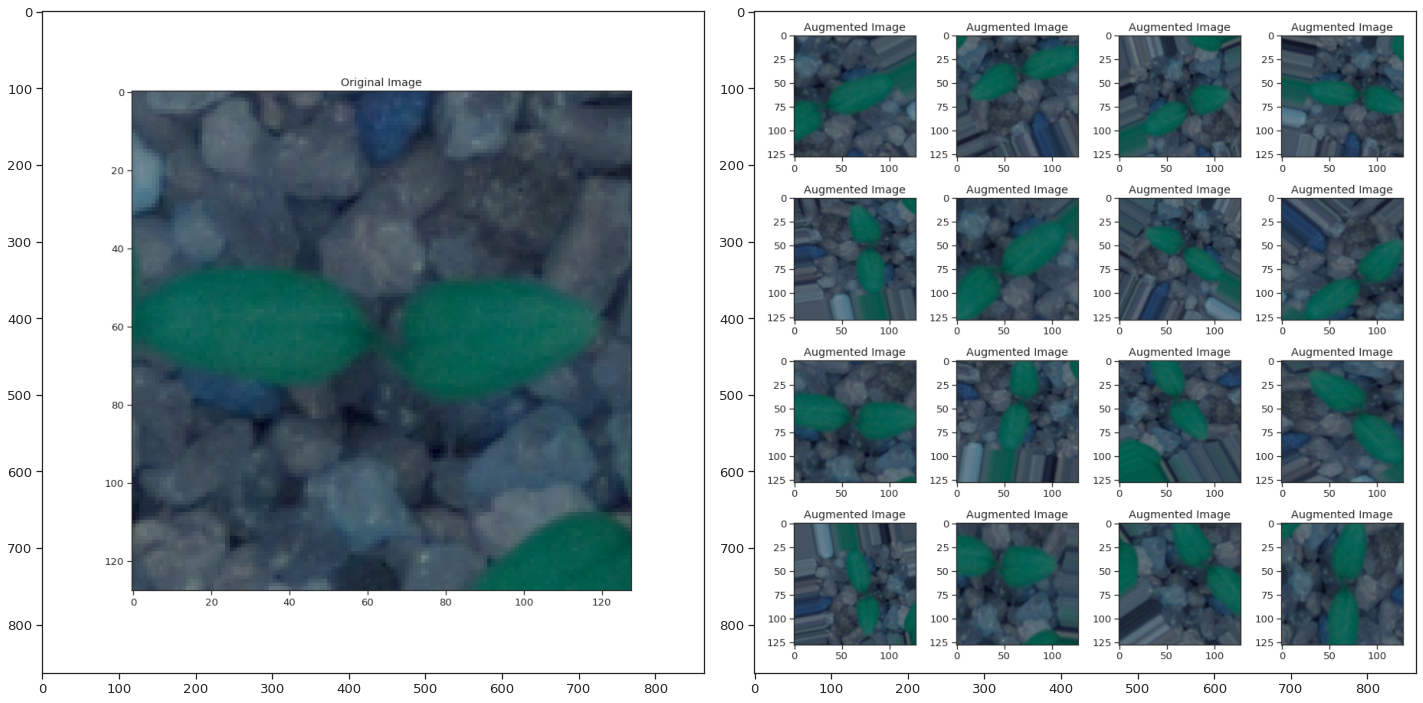

In [119]:
# Sense checking for ImageDataGenerator

# Sample Index (randomly selected)
i = 1000

# Grid Size
grid_size = (4, 4)

# expand dimension to one sample
sample = expand_dims(Xtrain_[i], 0)

# prepare iterator
# Takes data & label arrays, generates batches of augmented data
iterator = datagen.flow(sample, seed = seed)

# Associated image for y_train[0] --> X_train[0]
sns.set({'figure.figsize': (12, 12)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale = 1.2)
plt.imshow(X_train_[i], cmap = 'gray')
plt.title('Original Image')
plt.savefig('g0.png')
plt.close()

for i in range(np.prod(grid_size)):
  plt.subplot(grid_size[0], grid_size[1], i + 1)
  batch = iterator.next()
  plt.imshow(batch[0].astype('uint8'))
  plt.tight_layout()
  plt.title('Augmented Image')
plt.savefig('g1.png')
plt.close()

f, axarr = plt.subplots(1, 2, figsize = (20, 15))
axarr[0].imshow(mpimg.imread('g0.png'))
axarr[1].imshow(mpimg.imread('g1.png'))
plt.tight_layout();

- Looking at the image above, on the left side there's a random sample for an original input image, and on the right side there's a 4x4 grid with samples for augmented images from this randomly selected original image.

- This visual "sense checking" is important to calibrate the user-defined transformations to the training samples, ensuring the augmentation process is not distorting too much the original images.

- It can be seen that the all the user-defined transformations (rotation angle, zoom, flips and shifts) are being properly applied to the original image, therefore it's concluded the augmentation process is properly working.

In [120]:
# Creating the "KerasClassifier" within Sklearn
# A previously defined function "create_model" is used to instantiate a model following the tuned hyperparameters from the CNN model with original images.

CNN_original_augmented = create_model(optimizer = 'Adam', init = 'he_normal', learn_rate = 0.005, epsilon = 1e-08, activation = 'relu', input_sh = (128, 128, 3),
                                      filters_1st_conv = 64, kernel_1st_conv = 3, strides_1st_conv = (1, 1),
                                      filters_2nd_conv = 64, kernel_2nd_conv = 3, strides_2nd_conv = (1, 1),
                                      filters_3rd_conv = 64, kernel_3rd_conv = 3, strides_3rd_conv = (1, 1),
                                      filters_4th_conv = 128, kernel_4th_conv = 3, strides_4th_conv = (1, 1),
                                      pool_size = (2, 2), neurons_dense_1st = 128)

In [ ]:
# Fits the model on batches with real-time data augmentation
batch_size = 128
history_CNN_original_augmented = CNN_original_augmented.fit(datagen.flow(X_train_, y_train_, batch_size = batch_size, seed = seed),
                                                            validation_data = (X_val_, y_val_),
                                                            steps_per_epoch = len(X_train_) // batch_size, epochs = 75)

In [122]:
# Creating a dataframe with the Keras model records (history)
hist = pd.DataFrame(history_CNN_original_augmented.history)
hist.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,1.839212,0.412431,14.920098,0.138158
1,1.189491,0.584821,6.590097,0.111842
2,0.946434,0.670673,9.395211,0.140789
3,0.844059,0.710165,9.979774,0.132895
4,0.754881,0.740728,9.250730,0.131579


In [123]:
# Building a dataframe with all the records (epochs) of the Loss ('binary_crossentropy') and other model metrics for both Train and Validation sets
model_results = pd.DataFrame({"Epoch" : history_CNN_original_augmented.epoch,
                              "Training Crossentropy Loss" : hist.iloc[:, 0],
                              "Validation Crossentropy Loss" : hist.iloc[:, 2],
                              "Training Accuracy" : hist.iloc[:, 1],
                              "Validation Accuracy" : hist.iloc[:, 3]})
model_results.tail(10)

,Epoch,Training Crossentropy Loss,Validation Crossentropy Loss,Training Accuracy,Validation Accuracy
65,65,0.146795,2.056793,0.945055,0.590789
66,66,0.126861,0.663766,0.953640,0.865789
67,67,0.127666,0.533251,0.948489,0.872368
68,68,0.146905,1.179852,0.940247,0.768421
69,69,0.125766,0.615103,0.954327,0.872368
70,70,0.129953,0.580878,0.949728,0.830263
71,71,0.112829,0.595713,0.957418,0.832895
72,72,0.107616,0.934506,0.955357,0.765789
73,73,0.111672,0.507244,0.957418,0.860526
74,74,0.122687,0.835833,0.954327,0.811842


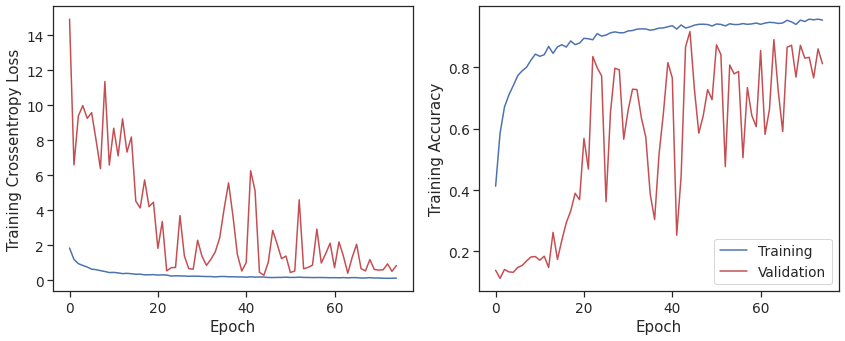

In [124]:
# Lineplot for the model Loss, with a hue to distinguish the Train set from the Validation set results
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale = 1.25)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x = "Epoch", y = "Training Crossentropy Loss", color = "b", data = model_results, ax = axs[0])
sns.lineplot(x = "Epoch", y = "Validation Crossentropy Loss", color = "r", data = model_results, ax = axs[0])

sns.lineplot(x = "Epoch", y = "Training Accuracy", color = "b", data = model_results, ax = axs[1])
sns.lineplot(x = "Epoch", y = "Validation Accuracy", color = "r", data = model_results, ax = axs[1])

plt.legend(['Training', 'Validation'], loc = 'lower right')
plt.tight_layout();

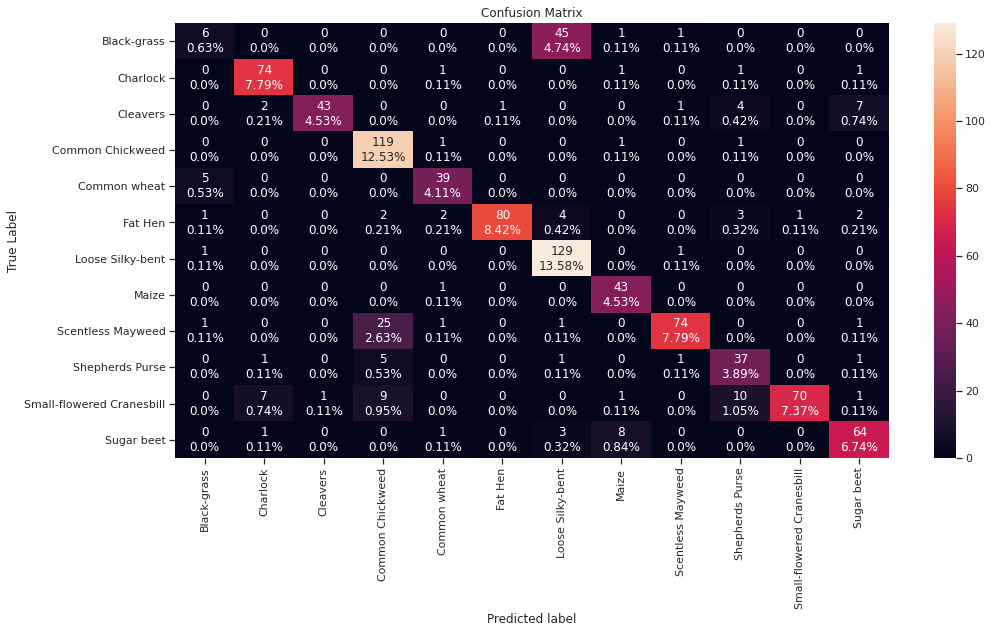


              precision    recall  f1-score   support

           0     0.4286    0.1132    0.1791        53
           1     0.8706    0.9487    0.9080        78
           2     0.9773    0.7414    0.8431        58
           3     0.7438    0.9754    0.8440       122
           4     0.8478    0.8864    0.8667        44
           5     0.9877    0.8421    0.9091        95
           6     0.7049    0.9847    0.8217       131
           7     0.7818    0.9773    0.8687        44
           8     0.9487    0.7184    0.8177       103
           9     0.6607    0.8043    0.7255        46
          10     0.9859    0.7071    0.8235        99
          11     0.8312    0.8312    0.8312        77

    accuracy                         0.8189       950
   macro avg     0.8141    0.7942    0.7865       950
weighted avg     0.8270    0.8189    0.8060       950



In [126]:
make_confusion_matrix(model = CNN_original_augmented, X_test = X_test, y_test = y_test, plot_title = "Confusion Matrix", summary_metrics = True, library = 'keras')

In [127]:
# Defining the list of CNN models to store the Test Accuracy results

CNN_model.append('Original_augmented')
test_accuracy.append(model_accuracy)

In [128]:
# Comparison dataframe with the Test Accuracy for all the CNN models

comparison_frame = pd.DataFrame({'CNN Model' : CNN_model, 'Test Accuracy' : test_accuracy}) 
comparison_frame.style.highlight_min(color = 'red', axis = 0).highlight_max(color = 'lightgreen', axis = 0)

,CNN Model,Test Accuracy
0,Original_initial,0.749474
1,Original_tuned,0.901053
2,Blurred_tuned,0.880000
3,Segmented_tuned,0.874737
4,Original_augmented,0.818947


- The CNN Model with Augmented images (CNN_original_augmented) returned a multiclass Accuracy of 0.8189 on the Test Set, which is worse than the tuned CNN models with Original (0.9011), Blurred (0.8800) and Segmented (0.8747) images.

- The class with most of the misclassifications was 'Black-grass' (Class '0') with a F1-Score of 0.1791 on the Test Set.

- The Accuracy result for this CNN Classification model was stored into a dataframe (comparison_frame) for a sake of comparison to other models along this session.

#### 5.6 - Fit and Evaluate the CNN Model with Image Augmentation for Original Images and Adjusted Learn Rate and Number of Epochs

- The key intuition here is that transforming data "on the fly" results in a slower training not only because there will be 'n_samples' transformed images generated in each epoch, but also because the inherent diversity from the augmented images would require more iterations to be properly train a CNN model. With that in mind, the next CNN model will be a variant of the previous one with lower learning rate (0.0005) and more epochs (150).

In [77]:
# Creating the "KerasClassifier" within Sklearn
# A previously defined function "create_model" is used to instantiate a model following the tuned hyperparameters from the CNN model with original images.
# Additional changes on the Learning Rate (changed to 0.0005) and on the number of Epochs (chnaged to 150) will be attempted here to improve the model Accuracy.

CNN_original_augmented_plus = create_model(optimizer = 'Adam', init = 'he_normal', learn_rate = 0.0005, epsilon = 1e-08, activation = 'relu', input_sh = (128, 128, 3),
                                           filters_1st_conv = 64, kernel_1st_conv = 3, strides_1st_conv = (1, 1),
                                           filters_2nd_conv = 64, kernel_2nd_conv = 3, strides_2nd_conv = (1, 1),
                                           filters_3rd_conv = 64, kernel_3rd_conv = 3, strides_3rd_conv = (1, 1),
                                           filters_4th_conv = 128, kernel_4th_conv = 3, strides_4th_conv = (1, 1),
                                           pool_size = (2, 2), neurons_dense_1st = 128)

In [ ]:
# Fits the model on batches with real-time data augmentation

batch_size = 128
history_CNN_original_augmented_plus = CNN_original_augmented_plus.fit(datagen.flow(X_train_, y_train_, batch_size = batch_size, seed = seed),
                                                                      validation_data = (X_val_, y_val_),
                                                                      steps_per_epoch = len(X_train_) // batch_size, epochs = 150)

In [79]:
# Creating a dataframe with the Keras model records (history)
hist = pd.DataFrame(history_CNN_original_augmented_plus.history)
hist.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,2.067263,0.341003,2.469597,0.113158
1,1.380150,0.542582,3.107365,0.134211
2,1.176307,0.608516,4.681174,0.136842
3,1.023051,0.659341,5.140721,0.136842
4,0.907515,0.698146,5.828627,0.136842


In [80]:
# Building a dataframe with all the records (epochs) of the Loss ('binary_crossentropy') and other model metrics for both Train and Validation sets
model_results = pd.DataFrame({"Epoch" : history_CNN_original_augmented_plus.epoch,
                              "Training Crossentropy Loss" : hist.iloc[:, 0],
                              "Validation Crossentropy Loss" : hist.iloc[:, 2],
                              "Training Accuracy" : hist.iloc[:, 1],
                              "Validation Accuracy" : hist.iloc[:, 3]})
model_results.tail(10)

,Epoch,Training Crossentropy Loss,Validation Crossentropy Loss,Training Accuracy,Validation Accuracy
140,140,0.080719,0.269729,0.972527,0.921053
141,141,0.087825,0.188460,0.968407,0.952632
142,142,0.090640,0.349297,0.966003,0.907895
143,143,0.090069,0.248100,0.966003,0.927632
144,144,0.083684,0.527722,0.967391,0.864474
145,145,0.081799,0.275572,0.967720,0.932895
146,146,0.073356,0.274856,0.973901,0.930263
147,147,0.078819,0.342386,0.968063,0.898684
148,148,0.079522,0.249116,0.971841,0.939474
149,149,0.076150,0.176844,0.972527,0.957895


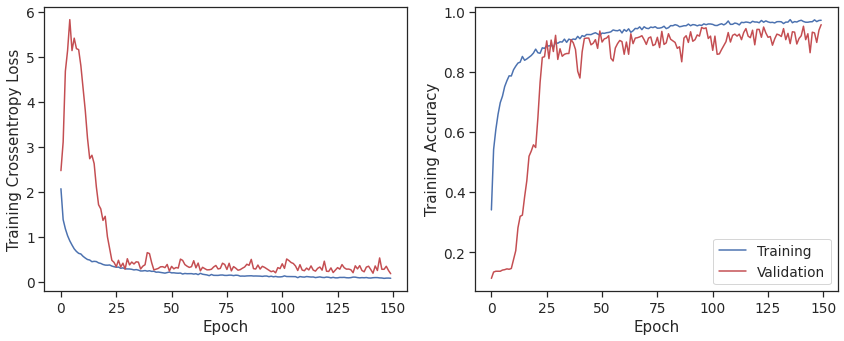

In [81]:
# Lineplot for the model Loss, with a hue to distinguish the Train set from the Validation set results
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale = 1.25)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x = "Epoch", y = "Training Crossentropy Loss", color = "b", data = model_results, ax = axs[0])
sns.lineplot(x = "Epoch", y = "Validation Crossentropy Loss", color = "r", data = model_results, ax = axs[0])

sns.lineplot(x = "Epoch", y = "Training Accuracy", color = "b", data = model_results, ax = axs[1])
sns.lineplot(x = "Epoch", y = "Validation Accuracy", color = "r", data = model_results, ax = axs[1])

plt.legend(['Training', 'Validation'], loc = 'lower right')
plt.tight_layout();

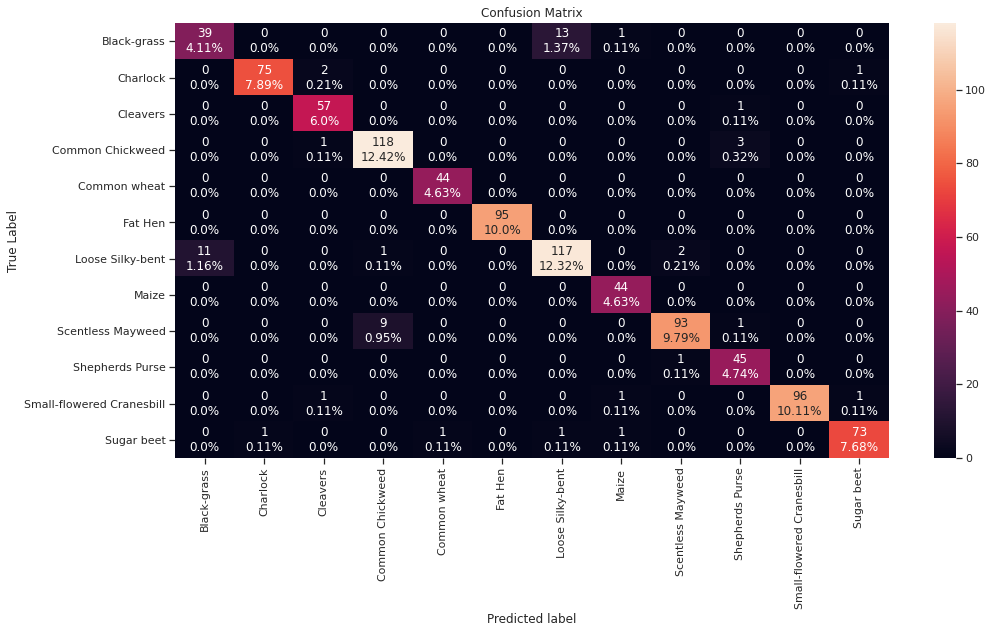


              precision    recall  f1-score   support

           0     0.7800    0.7358    0.7573        53
           1     0.9868    0.9615    0.9740        78
           2     0.9344    0.9828    0.9580        58
           3     0.9219    0.9672    0.9440       122
           4     0.9778    1.0000    0.9888        44
           5     1.0000    1.0000    1.0000        95
           6     0.8931    0.8931    0.8931       131
           7     0.9362    1.0000    0.9670        44
           8     0.9688    0.9029    0.9347       103
           9     0.9000    0.9783    0.9375        46
          10     1.0000    0.9697    0.9846        99
          11     0.9733    0.9481    0.9605        77

    accuracy                         0.9432       950
   macro avg     0.9394    0.9450    0.9416       950
weighted avg     0.9435    0.9432    0.9429       950



In [129]:
make_confusion_matrix(model = CNN_original_augmented_plus, X_test = X_test, y_test = y_test, 
                      plot_title = "Confusion Matrix", summary_metrics = True, library = 'keras')

In [130]:
# Defining the list of CNN models to store the Test Accuracy results

CNN_model.append('Original_augmented_plus')
test_accuracy.append(model_accuracy)

In [131]:
# Comparison dataframe with the Test Accuracy for all the CNN models

comparison_frame = pd.DataFrame({'CNN Model' : CNN_model, 'Test Accuracy' : test_accuracy}) 
comparison_frame.style.highlight_min(color = 'red', axis = 0).highlight_max(color = 'lightgreen', axis = 0)

,CNN Model,Test Accuracy
0,Original_initial,0.749474
1,Original_tuned,0.901053
2,Blurred_tuned,0.880000
3,Segmented_tuned,0.874737
4,Original_augmented,0.818947
5,Original_augmented_plus,0.943158


- The improved CNN Model with Augmented images (CNN_original_augmented_plus) returned a multiclass Accuracy of 0.9432 on the Test Set. This was the best CNN model compared to the other ones.

- The class with most of the misclassifications was 'Black-grass' (Class '0') with a F1-Score of 0.7573 on the Test Set. This F1-Score was also the best one across all models.

#### 5.7 - Comparing All CNN Models

In [132]:
# Sorting the models by Test Accuracy (ascending order)

comparison_frame.sort_values(["Test Accuracy"], ascending = True, inplace = True)

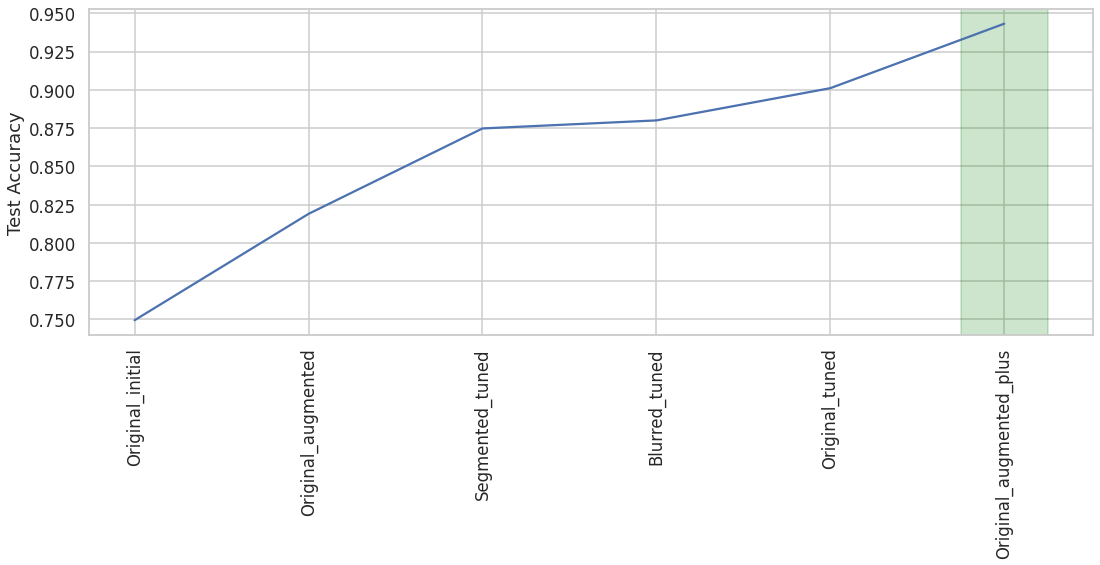

In [133]:
# Lineplot for all CNN models, sorted by Test Accuracy

sns.set({'figure.figsize': (18,6)})
sns.set_style("whitegrid")
sns.set_context("talk")
chart = sns.lineplot(x = "CNN Model", y = "Test Accuracy", data = comparison_frame)
chart.figure.canvas.draw()
x = chart.get_xticklabels()
chart.set_xticklabels(x, rotation = 90)
chart.axvspan(4.75, 5.25, color = 'green', alpha = 0.2)
chart.set(xlabel = None);

- As shown in the Lineplot above, the best Classification model was the Improved CNN Model with Augmented images (CNN_original_augmented_plus), with a multiclass Accuracy of 0.9432 on the Test Set (and also a F1-Score for 'Black-grass' (Class '0') of 0.7573 on the Test Set).

***
## 6 - Visualize Predictions for X_test[2], X_test[3], X_test[33], X_test[36], X_test[59]<a class="anchor" id="66666"></a>

In [143]:
# Previously Created Inverse Dictionary with the Labels for y

y_dictionary_inv

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [144]:
# Function to visualize the prediction for all CNN models

def visualize_predictions(X_test_index):
    
    # Actual Label for X_test[X_test_index] and Image Plot
    print("X_test[{}]".format(X_test_index))
    print("Actual Category Number    = {} | Actual Category Label    = {}\n".format(y_test[X_test_index][0], y_dictionary_inv[y_test[X_test_index][0]]))
    
    # Prediction for the Initial CNN model with Original images
    y_pred_original_initial = CNN_original_initial.predict_classes(X_test[X_test_index].reshape(1, 128, 128, 3))
    print("Initial CNN Model with Original Images")
    print("Predicted Category Number = {} | Predicted Category Label = {}\n".format(y_pred_original_initial[0], y_dictionary_inv[y_pred_original_initial[0]]))
    
    # Prediction for the Tuned model with Original images
    y_pred_original_tuned = CNN_original_tuned.predict(X_test[X_test_index].reshape(1, 128, 128, 3))
    print("Tuned CNN Model with Original Images")
    print("Predicted Category Number = {} | Predicted Category Label = {}\n".format(y_pred_original_tuned[0], y_dictionary_inv[y_pred_original_tuned[0]]))
    
    # Prediction for the Tuned model with Blurred images
    y_pred_blurred_tuned = CNN_blurred_tuned.predict(X_test_blurred[X_test_index].reshape(1, 128, 128, 3))
    print("Tuned CNN Model with Blurred Images")
    print("Predicted Category Number = {} | Predicted Category Label = {}\n".format(y_pred_blurred_tuned[0], y_dictionary_inv[y_pred_blurred_tuned[0]]))
    
    # Prediction for the Tuned model with Segmented images
    y_pred_segmented_tuned = CNN_segmented_tuned.predict(X_test_segmented[X_test_index].reshape(1, 128, 128, 3))
    print("Tuned CNN Model with Segmented Images")
    print("Predicted Category Number = {} | Predicted Category Label = {}\n".format(y_pred_segmented_tuned[0], y_dictionary_inv[y_pred_segmented_tuned[0]]))
    
    # Prediction for the Best Tuned model with Original Augmented images (initial learning rate and number of epochs)
    y_pred_original_augmented = CNN_original_augmented.predict_classes(X_test[X_test_index].reshape(1, 128, 128, 3))
    print("CNN Model with Augmented Images")
    print("Predicted Category Number = {} | Predicted Category Label = {}\n".format(y_pred_original_augmented[0], y_dictionary_inv[y_pred_original_augmented[0]]))
    
    # Prediction for the Best Tuned model with Original Augmented images (reduced learning rate and increased number of epochs)
    y_pred_original_augmented_plus = CNN_original_augmented_plus.predict_classes(X_test[X_test_index].reshape(1, 128, 128, 3))
    print("CNN Model with Augmented Images and Slower Training (Adjusted Learn Rate and Number of Epochs)")
    print("Predicted Category Number = {} | Predicted Category Label = {}\n".format(y_pred_original_augmented_plus[0], 
                                                                                    y_dictionary_inv[y_pred_original_augmented_plus[0]]))
    
    # Plotting X_test[X_test_index] image with its respective image
    sns.set_style("whitegrid")
    sns.set_style("ticks")
    fig, axs = plt.subplots(1, 3, figsize = (15, 5))
    axs[0].title.set_text('Original Image')
    axs[0].imshow(X_test[X_test_index], cmap = 'gray')
    axs[1].title.set_text('Blurred Image')
    axs[1].imshow(X_test_blurred[X_test_index], cmap = 'gray')
    axs[2].title.set_text('Segmented Image')
    axs[2].imshow(X_test_segmented[X_test_index], cmap = 'gray');

#### 6.1 - Visualize Predictions for X_test[2]

X_test[2]
Actual Category Number    = 7 | Actual Category Label    = Maize

Initial CNN Model with Original Images
Predicted Category Number = 7 | Predicted Category Label = Maize

Tuned CNN Model with Original Images
Predicted Category Number = 7 | Predicted Category Label = Maize

Tuned CNN Model with Blurred Images
Predicted Category Number = 7 | Predicted Category Label = Maize

Tuned CNN Model with Segmented Images
Predicted Category Number = 7 | Predicted Category Label = Maize

CNN Model with Augmented Images
Predicted Category Number = 7 | Predicted Category Label = Maize

CNN Model with Augmented Images and Slower Training (Adjusted Learn Rate and Number of Epochs)
Predicted Category Number = 7 | Predicted Category Label = Maize



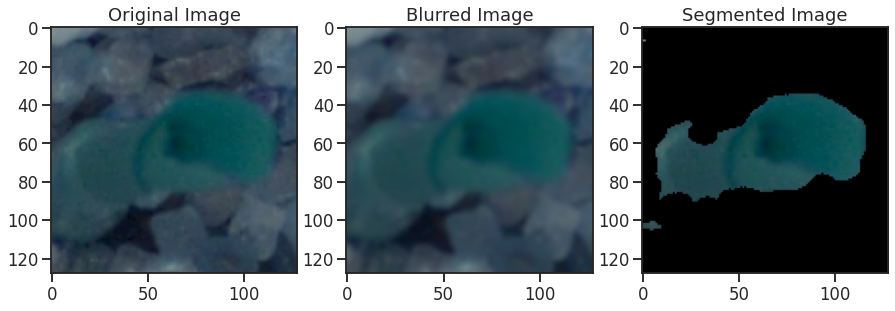

In [145]:
# Prediction Results for X_test[2]
visualize_predictions(X_test_index = 2)

- X_test[2] correct Category Label 'Maize' (Category Number 07). 

- All CNN models (Original_initial, Original_tuned, Blurred_tuned, Segmented_tuned, Original_augmented, Original_augmented_plus) were able to predict the correct class for X_test[2].

#### 6.2 - Visualize Predictions for X_test[3]

X_test[3]
Actual Category Number    = 3 | Actual Category Label    = Common Chickweed

Initial CNN Model with Original Images
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed

Tuned CNN Model with Original Images
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed

Tuned CNN Model with Blurred Images
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed

Tuned CNN Model with Segmented Images
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed

CNN Model with Augmented Images
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed

CNN Model with Augmented Images and Slower Training (Adjusted Learn Rate and Number of Epochs)
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed



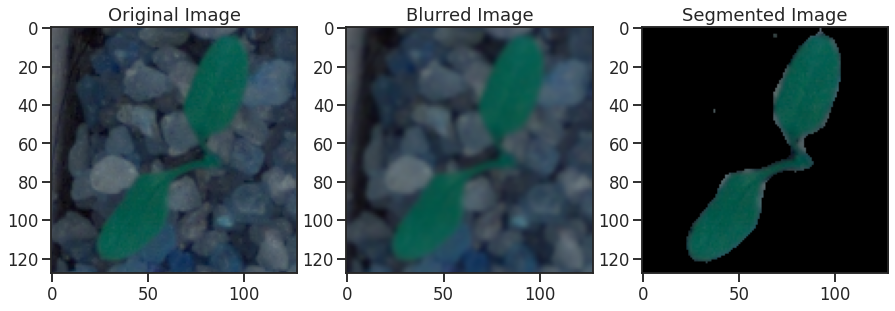

In [146]:
# Prediction Results for X_test[3]
visualize_predictions(X_test_index = 3)

- X_test[3] correct Category Label 'Common Chickweed' (Category Number 03). 

- All CNN models (Original_initial, Original_tuned, Blurred_tuned, Segmented_tuned, Original_augmented, Original_augmented_plus) were able to predict the correct class for X_test[3].

#### 6.3 - Visualize Predictions for X_test[33]

X_test[33]
Actual Category Number    = 11 | Actual Category Label    = Sugar beet

Initial CNN Model with Original Images
Predicted Category Number = 11 | Predicted Category Label = Sugar beet

Tuned CNN Model with Original Images
Predicted Category Number = 11 | Predicted Category Label = Sugar beet

Tuned CNN Model with Blurred Images
Predicted Category Number = 11 | Predicted Category Label = Sugar beet

Tuned CNN Model with Segmented Images
Predicted Category Number = 11 | Predicted Category Label = Sugar beet

CNN Model with Augmented Images
Predicted Category Number = 7 | Predicted Category Label = Maize

CNN Model with Augmented Images and Slower Training (Adjusted Learn Rate and Number of Epochs)
Predicted Category Number = 11 | Predicted Category Label = Sugar beet



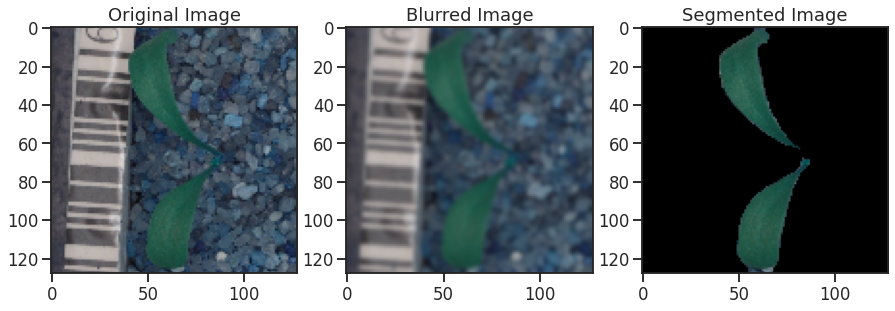

In [147]:
# Prediction Results for X_test[33]
visualize_predictions(X_test_index = 33)

- X_test[33] correct Category Label 'Sugar beet' (Category Number 11). 

- CNN models with correct prediction for X_test[33]: Original_initial, Original_tuned, Blurred_tuned, Segmented_tuned and Original_augmented_plus.

- CNN model with incorrect prediction for X_test[33]: Original_augmented.

#### 6.4 - Visualize Predictions for X_test[36]

X_test[36]
Actual Category Number    = 4 | Actual Category Label    = Common wheat

Initial CNN Model with Original Images
Predicted Category Number = 7 | Predicted Category Label = Maize

Tuned CNN Model with Original Images
Predicted Category Number = 4 | Predicted Category Label = Common wheat

Tuned CNN Model with Blurred Images
Predicted Category Number = 6 | Predicted Category Label = Loose Silky-bent

Tuned CNN Model with Segmented Images
Predicted Category Number = 4 | Predicted Category Label = Common wheat

Tuned CNN Model with Augmented Images
Predicted Category Number = 4 | Predicted Category Label = Common wheat

Tuned CNN Model with Augmented Images and Slower Training
Predicted Category Number = 4 | Predicted Category Label = Common wheat



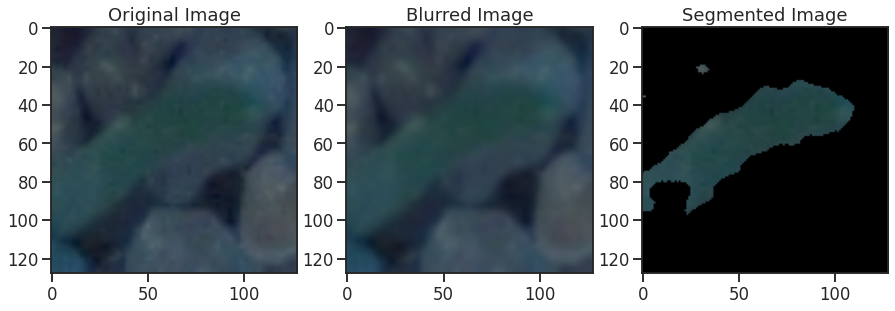

In [139]:
# Prediction Results for X_test[36]
visualize_predictions(X_test_index = 36)

- X_test[36] correct Category Label 'Common wheat' (Category Number 04). 

- CNN models with correct prediction for X_test[36]: Original_tuned, Segmented_tuned, Original_augmented and Original_augmented_plus.

- CNN model with incorrect prediction for X_test[36]: Original_initial and Blurred_tuned.

#### 6.5 - Visualize Predictions for X_test[59]

X_test[59]
Actual Category Number    = 3 | Actual Category Label    = Common Chickweed

Initial CNN Model with Original Images
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed

Tuned CNN Model with Original Images
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed

Tuned CNN Model with Blurred Images
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed

Tuned CNN Model with Segmented Images
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed

Tuned CNN Model with Augmented Images
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed

Tuned CNN Model with Augmented Images and Slower Training
Predicted Category Number = 3 | Predicted Category Label = Common Chickweed



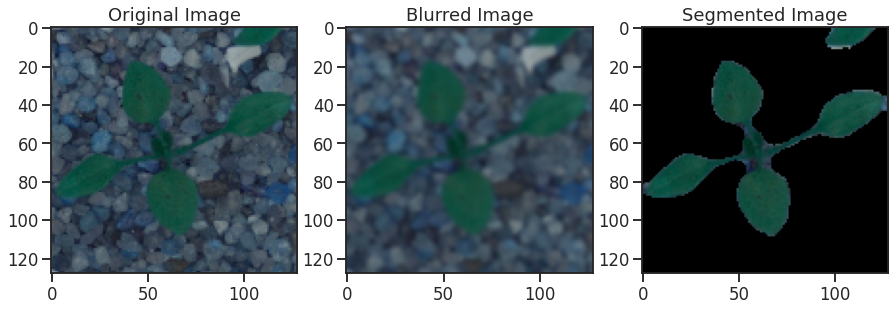

In [140]:
# Prediction Results for X_test[59]
visualize_predictions(X_test_index = 59)

- X_test[59] correct Category Label 'Common Chickweed' (Category Number 03). 

- All CNN models (Original_initial, Original_tuned, Blurred_tuned,  Segmented_tuned, Original_augmented, Original_augmented_plus) were able to predict the correct class for X_test[59].

***
## 7 - Final Remarks<a class="anchor" id="77777"></a>

In [142]:
# Comparison dataframe with the Test Accuracy for all the CNN models

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

,CNN Model,Test Accuracy
0,Original_initial,0.749474
4,Original_augmented,0.818947
3,Segmented_tuned,0.874737
2,Blurred_tuned,0.880000
1,Original_tuned,0.901053
5,Original_augmented_plus,0.943158


- Looking at the summary table above, the best Classification model was the Improved CNN Model with Augmented images (CNN_original_augmented_plus), with a multiclass Accuracy of 0.9432 on the Test Set and a F1-Score for 'Black-grass' (Class '0') of 0.7573 on the Test Set. The "barebone" for this model came from the hyperparameters tuning process at the model with Original images. In order to enhance the training process for the augmented images, a lower learning rate (0.0005) and more epochs (150) were utilized.

- Even though the accuracy results for the Improved CNN Model with Augmented images are quite good, some additional strategies could be explored to potentially improve the model accuracy. These additional strategies could include: 
  - Tweak the list of hyperparameters, add more Randomized Search iterations and increase the number of folds for Cross-validation to 03.
  - Improve the images segmentation process by tweaking the range of green in the HSV color-space, improving the morphological transformations and add sharpness ('addWeighted').
  - Better explore the images augmentation process by tweaking/tuning the user-defined transformations (rotation angle, zoom, flips, shifts etc).
  - Develop a hyperparameters tuning strategy combined to the images augmentation process.

- Google Colab Pro connected to the GPU Hardware Accelerator was used to train the CNN models. By running this notebook on the GPU multiple times, it's expected that the results will slightly vary - this is because the backend may be configured to use a sophisticated stack of GPU libraries, and that some of these may introduce their own source of randomness. See reference: https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

In [159]:
# Exporting the Google Colab Notebook to html

!jupyter nbconvert --to html Computer_Vision_Plant_Seedlings_Image_Classification_Final.ipynb

[NbConvertApp] Converting notebook Computer_Vision_Plant_Seedlings_Image_Classification_Final.ipynb to html
[NbConvertApp] Writing 42070513 bytes to Computer_Vision_Plant_Seedlings_Image_Classification_Final.html
